# **`Lending Club Case Study`**

A consumer finance company which specialises in lending various types of loans to urban customers.


## Business Understanding

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.

Two  **types of risks**  are associated with the bank’s decision:

-   If the applicant is **likely to repay the loan**, then not approving the loan results in a  **loss of business**  to the company
    
-   If the applicant is  **not likely to repay the loan,**  i.e. he/she is likely to default, then approving the loan may lead to a  **financial loss**  for the company

## Aim

To identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.


## Case Study Approach

We will approaching this in **4 stages**:

1. Data understanding

2. Data cleaning

3. Data Analysis

4. Recommendations

#### Importing required libraries

In [1]:
## Numpy and Pandas to contain and perform operations on data
import numpy as np # for mathematical operations
import pandas as pd # for reading and manipulation of data

## Matplotlib and Seaborn to visualize the data once we have cleaned up data
import matplotlib.pyplot as plt # for plotting charts and graphs
import seaborn as sns # for better charts and graphs (advanced graph library that uses matplotlib)

## Ignore the warnings
import warnings 
#warnings.filterwarnings("ignore")
warnings.simplefilter('always')

import math

#### Loading DataSet

In [2]:
loanDataSet_df = pd.read_csv('loan.csv',low_memory=False) #switched off low_memory else 47 columns were getting parsed as mixed types

## <font color =orange> **1. Data Understanding**

In [3]:
# Reading dataset
loanDataSet_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Extracting information of dataset i.e. datatypes and non-null count in each column.
loanDataSet_df.info(verbose=True, show_counts=True) # verbose and show_counts flag has to be explicitly used since our dataset is bigger than 'pandas.options.display.max_info_columns'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

Since **loan_status** is target variable hence checking possible values it can have 

In [5]:
loanDataSet_df.loan_status.unique() # will print unique values in column 'loan_status'

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

#### Outcome - Data Understanding

There are **111 columns**  (or variables) out of which 74 are of datatype float, 64 of int64 and 24 are object.  

In total we have **39717 rows**.

This is what we have at start of this exercise. As we clean and analyse dataset, the columns and rows will vary based on operations applied.

We have observed following quality issues:

1. Many **columns** which have **no values** which makes them candidate for Data cleaning stage. 
2. Some **rows** have **null values in some columns** which will also be treated in cleaning phase of data analysis.
3. There are certain customer behavioural columns which are available post loan start and hence will not be available before loan start and cannot be used to estimate whether a said prespective customer will ***default*** or not  
4. There 3 types of **loan_status** in provided dataset, out of which **Current** will not be useful as said customers can ***default*** or not. Since target variable itself is unknown for these customers hence the analysis will not be accurate if we include them.


## <font color =orange> **2. Data Cleaning**

Based on previous stage outcome and generic data cleaning guidelines we will be peforming follwing set of operations on the dataset:

1. Remove Customer Behaviour Variables.
2. Removing irrelevant/redundant columns
3. Filter out rows having loan_status as **current**.
4. Removing all columns which have higher percentage of missing values.
5. Removing rows which are entirely null or duplicated
6. Removing all columns which have constant values
7. Fix Datatypes.
8. Remove Outliers.


As its indicated we will be doing data filtering first, as doing this first before starting cleaning we will have less number of columns to look for missing data and hence we will not end up fixing a column which we eventually will drop.

In [6]:
def printColumnCount(dataframe):
    print("Now we are left with " + '\033[1m' + str(dataframe.shape[1]) + ' columns')
    
def printRowCount(dataframe):
    print("Now we are left with " + '\033[1m' + str(dataframe.shape[0]) + ' rows')

### Removing Customer Behaviour Variables

The dataset contains Customer Behavior Variables which are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. As these variables are generated post loan is disbursed hence will not be helpful in bucketing if a said applicatant can ***default*** or not, as per business requirement we have to recommend drivers which can help is preventing loan disbursement to presepctive ***defaulters***.

We will be dropping following columns:

 - delinq_2yrs
 - earliest_cr_line
 - inq_last_6mths
 - open_acc
 - pub_rec
 - revol_bal
 - revol_util
 - total_acc
 - out_prncp
 - out_prncp_inv
 - total_pymnt
 - total_pymnt_inv
 - total_rec_prncp
 - total_rec_int
 - total_rec_late_fee
 - recoveries
 - collection_recovery_fee
 - last_pymnt_d
 - last_pymnt_amnt
 - last_credit_pull_d
 - application_type


In [7]:
loanDataSet_df.drop(['delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',], axis=1, inplace=True)
printColumnCount(loanDataSet_df)

Now we are left with 91 columns


### Removing irrelevant/redundant columns

We will be removing following columns:

- **url**: URL for the LC page with listing data. Which only has Id as unique parameter which we already have hence redundant.
- **zip_code**: The first 3 numbers of the zip code provided by the borrower in the loan application. Since its first 3 digits hence there are chances they will not be unique and can lead to confusion rather than helping us drill down demographical patterns(if any).
- **title**: loan title provided by the borrower. Which can be any value hence we will be dropping since we might not be draw out any conclusion due to lack of grouping/structure of data 

In [8]:
loanDataSet_df.drop(['url','zip_code','title'], axis=1, inplace=True)
printColumnCount(loanDataSet_df)

Now we are left with 88 columns


### Filtering out rows having loan_status as `current`.


We cannot be conclusive of the applicants which have a running loan whether the will ***default** or not. Hence we will filtering out all row having have loan status as **current**

In [9]:
loanDataSet_df[loanDataSet_df.loan_status == 'Current'].shape

(1140, 88)

There are **1140** rows which will be filtered out

In [10]:
loanDataSet_df = loanDataSet_df[loanDataSet_df.loan_status != 'Current']
printRowCount(loanDataSet_df)

Now we are left with 38577 rows


The number of **rows** now reduced to **38577**

### Removing all columns which have higher percentage of missing values


#### <font color =blue> Dropping all the columns with all missing values

In [11]:
allNullValuesColumnSeries = loanDataSet_df.isna().sum()[loanDataSet_df.isna().sum() == len(loanDataSet_df)]
len(allNullValuesColumnSeries)

55

In [12]:
allNullValuesColumnSeries.index

Index(['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
     

There are **55 columns** which are completely null as observed above hence we will proceed with dropping them entirely as the will be of no value to our analysis

In [13]:
loanDataSet_df = loanDataSet_df.dropna(axis=1, how='all')
printColumnCount(loanDataSet_df)

Now we are left with 33 columns


#### <font color =blue> Dropping all the columns with higher percentage of missing values

In [14]:
someNullValuesColumnSeries = loanDataSet_df.isna().sum()[loanDataSet_df.isna().sum() > 0]
len(someNullValuesColumnSeries)

9

In [15]:
someNullValuesColumnSeries

emp_title                      2386
emp_length                     1033
desc                          12527
mths_since_last_delinq        24905
mths_since_last_record        35837
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [16]:
someNullValuesColumnSeries.apply(lambda x : round(x/len(loanDataSet_df)*100))

emp_title                      6
emp_length                     3
desc                          32
mths_since_last_delinq        65
mths_since_last_record        93
collections_12_mths_ex_med     0
chargeoff_within_12_mths       0
pub_rec_bankruptcies           2
tax_liens                      0
dtype: int64

From above percentages we can clearly see **mths_since_last_delinq** and **mths_since_last_record** have more that 50% of data missing/null hence we will be dropping them.

In [17]:
loanDataSet_df = loanDataSet_df.drop(['mths_since_last_delinq','mths_since_last_record'], axis=1)
printColumnCount(loanDataSet_df)

Now we are left with 31 columns


We are still having **8 columns** which contain some null values, but except **desc** rest all are having nulls in single digit percentage, hence the columns can be used as is.

While **desc** (Loan description provided by the borrower) has significant amount of null values but not very high so we will first check the kind of data it contains before taking a call to drop or continue as is.

In [18]:
loanDataSet_df.desc

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
5                                                      NaN
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 38577, dtype: object

From above snippet we can clearly see it contains strings of description provided by borrower which we feel is not relevant to our analysis hence we will be dropping this column also.

In [19]:
loanDataSet_df = loanDataSet_df.drop(['desc'], axis=1)
printColumnCount(loanDataSet_df)

Now we are left with 30 columns


### Removing rows which are entirely null or duplicated


#### <font color =blue> Dropping all the rows with all missing values(entirely null)

In [20]:
loanDataSet_df[(loanDataSet_df.isna().sum(axis=1) == len(loanDataSet_df.columns))]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


So this means no such rows which are entirely null

#### <font color =blue> Dropping all the rows which are duplicated

In [21]:
loanDataSet_df.duplicated().sum()

0

No duplicated rows found.

### Removing all columns which have constant values


#### <font color =blue> Dropping all the numeric columns with constant values

In [22]:
loanDataSet_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.0,1.0,0.0,0.0,0.0,0.043479,0.0
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.0,0.0,0.0,0.0,0.0,0.204583,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


As we can observe above that following columns have a constant value since their **mean**, **median**, **min** and **max** are exactly same value.

- collections_12_mths_ex_med
- acc_now_delinq
- chargeoff_within_12_mths
- delinq_amnt
- tax_liens
- policy_code

The same values indicate that whole column has constant value, thereby they will not be able to provide any insight in our analysis, hence dropping them.

In [23]:
loanDataSet_column_Metrics_df = loanDataSet_df.describe().transpose()
constant_columns_list = loanDataSet_column_Metrics_df[loanDataSet_column_Metrics_df['min'] == loanDataSet_column_Metrics_df['max']].index
constant_columns_list

Index(['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [24]:
loanDataSet_df = loanDataSet_df.drop(constant_columns_list, axis=1)
printColumnCount(loanDataSet_df)

Now we are left with 24 columns


#### <font color =blue> Dropping all the catergorical columns with constant values

We have dropped all the numeric columns having constant values, now we will be doing same for object based columns since a constant column there also does not help us.

In [25]:
loanDataSet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   member_id             38577 non-null  int64  
 2   loan_amnt             38577 non-null  int64  
 3   funded_amnt           38577 non-null  int64  
 4   funded_amnt_inv       38577 non-null  float64
 5   term                  38577 non-null  object 
 6   int_rate              38577 non-null  object 
 7   installment           38577 non-null  float64
 8   grade                 38577 non-null  object 
 9   sub_grade             38577 non-null  object 
 10  emp_title             36191 non-null  object 
 11  emp_length            37544 non-null  object 
 12  home_ownership        38577 non-null  object 
 13  annual_inc            38577 non-null  float64
 14  verification_status   38577 non-null  object 
 15  issue_d            

In [26]:
categoricalColumns = loanDataSet_df.dtypes[loanDataSet_df.dtypes == object].index # extracting all columns having object datatypes
categoricalColumns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status',
       'application_type'],
      dtype='object')

In [27]:
len(categoricalColumns)

15

Now we will check value counts for each of the **15 columns**


In [28]:
def checkForConstantValues(column):
    if len(loanDataSet_df[column].value_counts()) == 1:
        print('\033[1m' + column + '\033[0m' + " has only one unique values i.e. constant column ")

for column in categoricalColumns:
    checkForConstantValues(column)

pymnt_plan has only one unique values i.e. constant column 
initial_list_status has only one unique values i.e. constant column 
application_type has only one unique values i.e. constant column 


Thus we can observe that following columns has only one contant catgeorical value across all rows:

- pymnt_plan
- application_type
- initial_list_status

So we will be dropping them.

In [29]:
loanDataSet_df = loanDataSet_df.drop(['pymnt_plan', 'application_type', 'initial_list_status'], axis=1)
printColumnCount(loanDataSet_df)

Now we are left with 21 columns


### Fixing data types

In [30]:
loanDataSet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   member_id             38577 non-null  int64  
 2   loan_amnt             38577 non-null  int64  
 3   funded_amnt           38577 non-null  int64  
 4   funded_amnt_inv       38577 non-null  float64
 5   term                  38577 non-null  object 
 6   int_rate              38577 non-null  object 
 7   installment           38577 non-null  float64
 8   grade                 38577 non-null  object 
 9   sub_grade             38577 non-null  object 
 10  emp_title             36191 non-null  object 
 11  emp_length            37544 non-null  object 
 12  home_ownership        38577 non-null  object 
 13  annual_inc            38577 non-null  float64
 14  verification_status   38577 non-null  object 
 15  issue_d            

In [31]:
pd.set_option('display.max_columns', None)
loanDataSet_df.head()
#pd.reset_option("max_columns")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [32]:
categoricalColumns = loanDataSet_df.dtypes[loanDataSet_df.dtypes == object].index # extracting all columns having object datatypes
categoricalColumns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state'],
      dtype='object')

From observing dataframe info and just the first 5 rows we can conclude that following columns datatype can be corrected by performing operations:

- **term** - By dropping **months** in data we can convert this column to numeric column
- **int_rate** - By dropping **%** in data we can convert this column to numeric column

#### <font color =blue> Removing the **`months`** suffix and empty space prefix from the values in 'term' column and converting to int dtype

In [33]:
loanDataSet_df.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

So we can clearly take first two values excluding first space to tranform this column

In [34]:
loanDataSet_df.term = loanDataSet_df.term.apply(lambda x: int(x[1:3]))

#### <font color =blue> Removing the **`%`** symbol from the values in 'int_rate' column and converting to float dtype

In [35]:
loanDataSet_df.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

Here we just need to trim the **%** symbol

In [36]:
loanDataSet_df.int_rate = loanDataSet_df.int_rate.apply(lambda x: float(x[:-1]))

### Removing Outliers

In [37]:
loanDataSet_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,38577.0,676378.706561,209263.898488,54734.00,512033.00,656423.00,829146.00,1077501.00
member_id,38577.0,842284.337429,264451.929349,70699.00,661131.00,839292.00,1037336.00,1314167.00
loan_amnt,38577.0,11047.025430,7348.441646,500.00,5300.00,9600.00,15000.00,35000.00
funded_amnt,38577.0,10784.058506,7090.306027,500.00,5200.00,9550.00,15000.00,35000.00
funded_amnt_inv,38577.0,10222.481123,7022.720644,0.00,5000.00,8733.44,14000.00,35000.00
term,38577.0,41.898437,10.333136,36.00,36.00,36.00,36.00,60.00
int_rate,38577.0,11.932219,3.691327,5.42,8.94,11.71,14.38,24.40
installment,38577.0,322.466318,208.639215,15.69,165.74,277.86,425.55,1305.19
annual_inc,38577.0,68777.973681,64218.681802,4000.00,40000.00,58868.00,82000.00,6000000.00
dti,38577.0,13.272727,6.673044,0.00,8.13,13.37,18.56,29.99



annual_inc
installment

From this its clearly visible that **annual_inc** is candidate for outlier treatment. We will plot a box plot with rest of the variables so that we can verify if any other column has such tendency.

Also removing id and member id since these are autogenerative variable and have no value in outlier analysis.

In [38]:
numericColumnsList = loanDataSet_df.describe().transpose().index.tolist()
numericColumnsList.remove('annual_inc')
numericColumnsList.remove('member_id')
numericColumnsList.remove('id')

<AxesSubplot:>

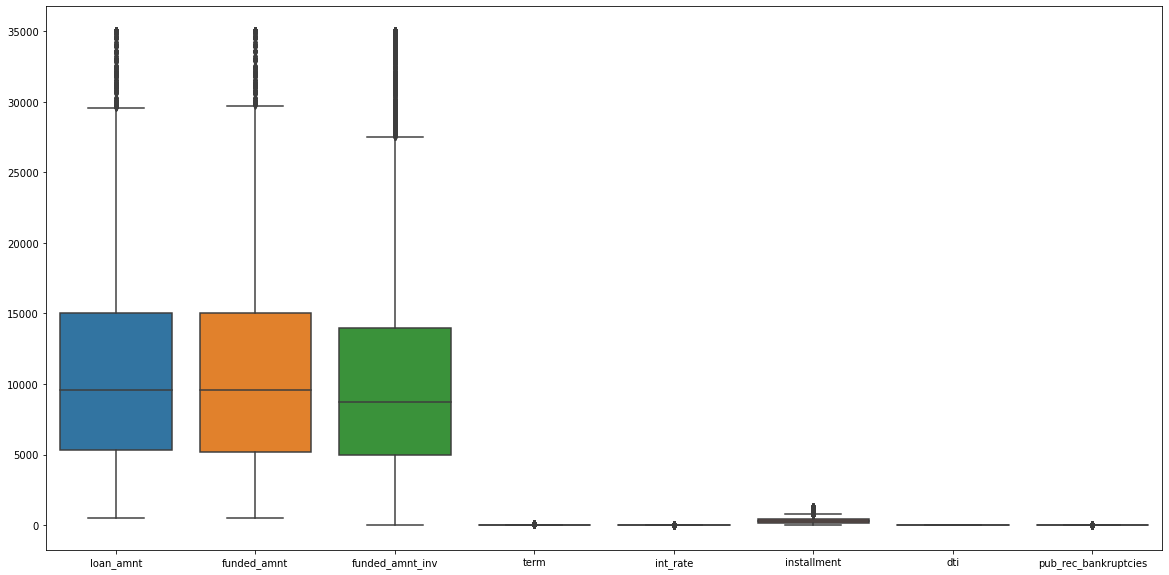

In [39]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=loanDataSet_df[numericColumnsList])

**loan_amnt**, **funded_amnt** and **funded_amnt** 

<AxesSubplot:>

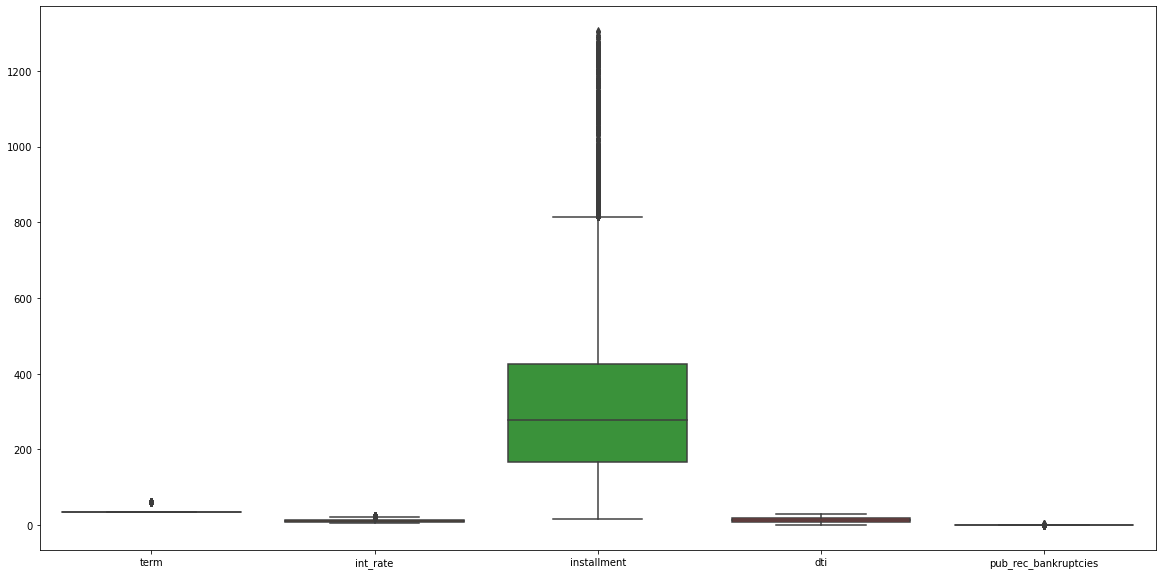

In [40]:
numericColumnsList.remove('loan_amnt')
numericColumnsList.remove('funded_amnt')
numericColumnsList.remove('funded_amnt_inv')

plt.figure(figsize=(20, 10))
sns.boxplot(data=loanDataSet_df[numericColumnsList])

<AxesSubplot:>

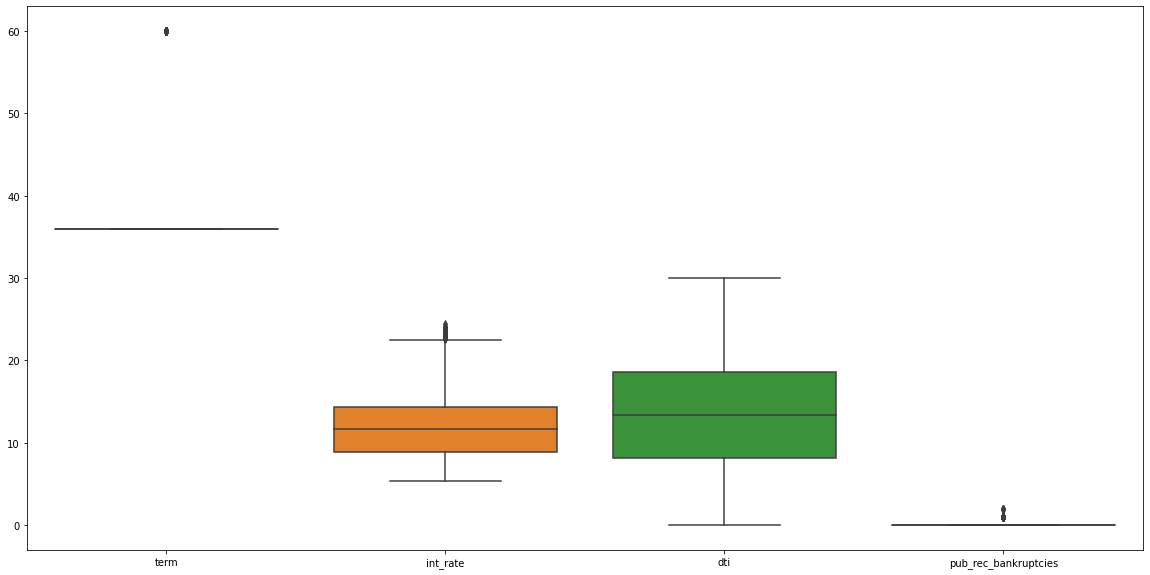

In [41]:
numericColumnsList.remove('installment')

plt.figure(figsize=(20, 10))
sns.boxplot(data=loanDataSet_df[numericColumnsList])

<AxesSubplot:>

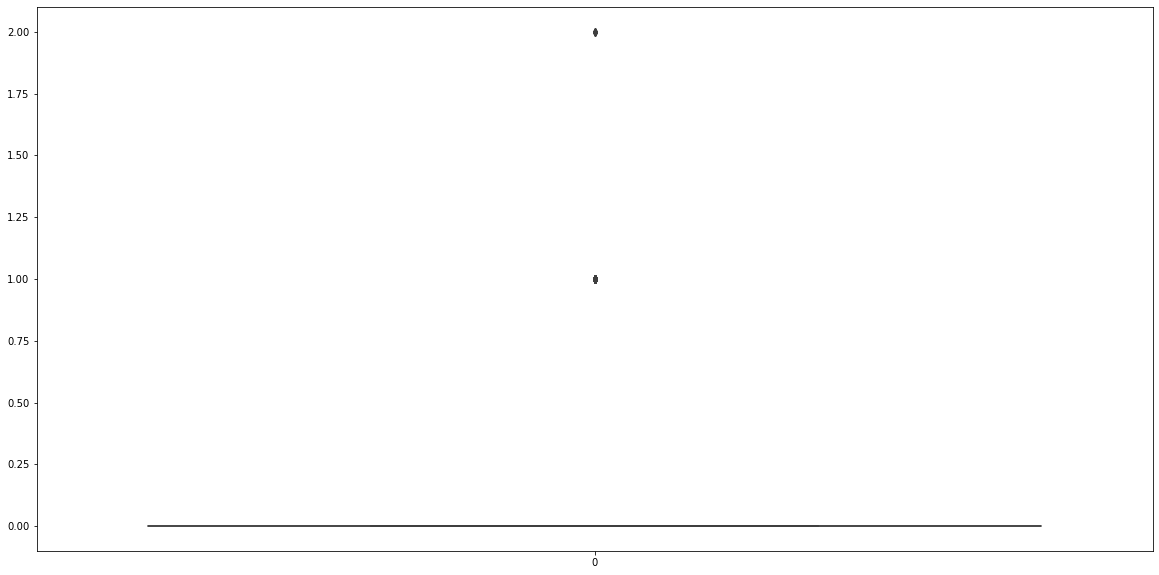

In [42]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=loanDataSet_df['pub_rec_bankruptcies'])

In [43]:
loanDataSet_df['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

**No outliers** here just very few applicants who have 2 bankruptcies on public record

<AxesSubplot:>

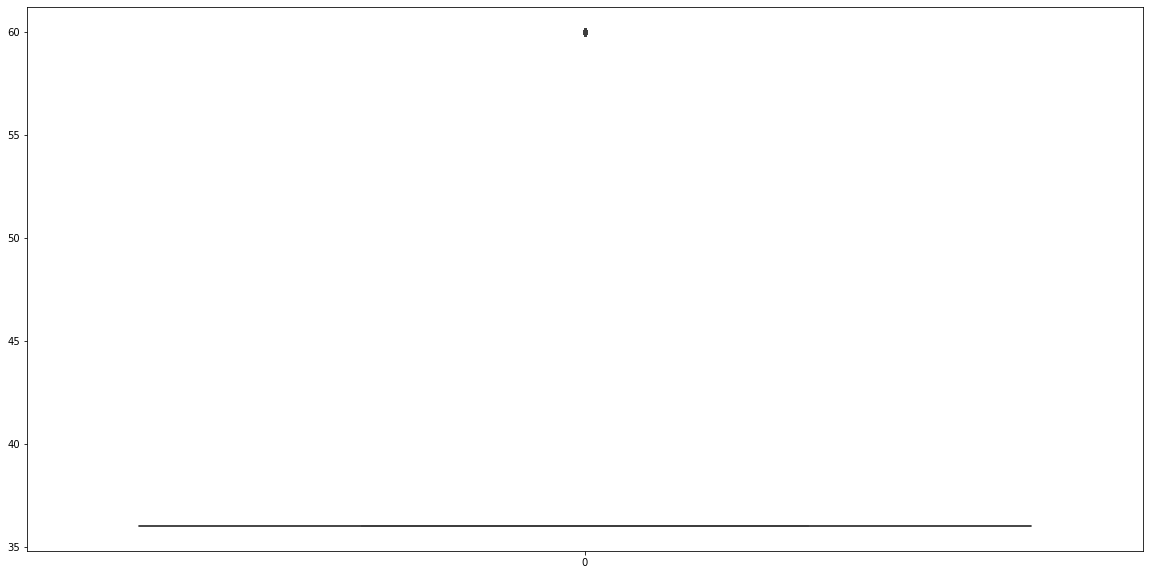

In [44]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=loanDataSet_df['term'])

In [45]:
loanDataSet_df['term'].value_counts()

36    29096
60     9481
Name: term, dtype: int64

**No outliers** here as both values have sufficient spread.

As observed except **annual_inc** no visible outliers in rest of the columns as they seem to evenly spread out over whiskers. Hence we will getting in to outlier treatment for **annual_inc**.

<AxesSubplot:>

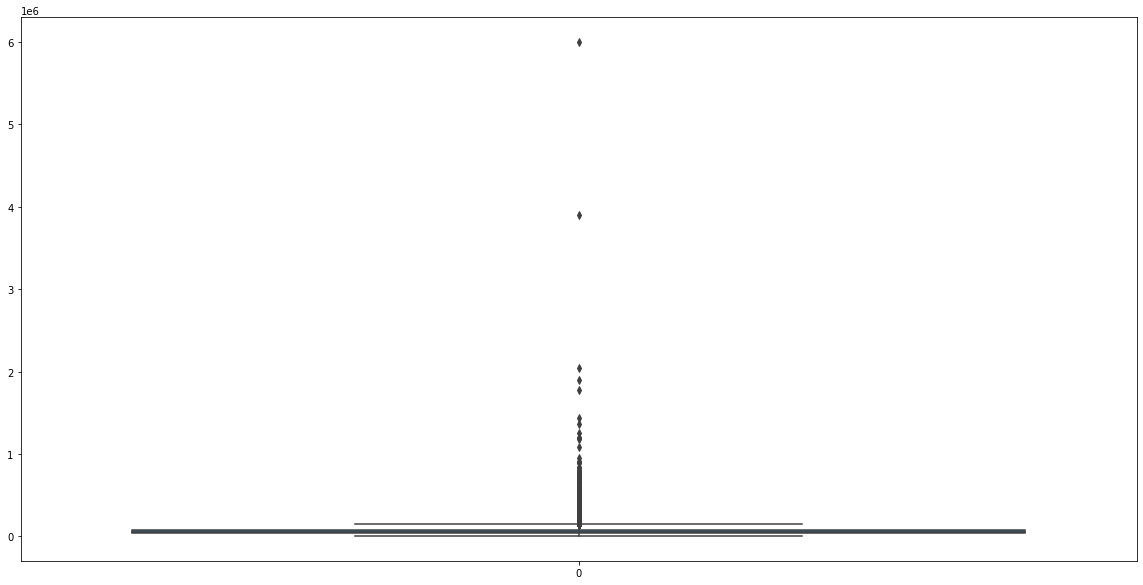

In [46]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=loanDataSet_df['annual_inc'])

Box plot confirming out analysis about outliers.

In [47]:
# checking for max value
max(loanDataSet_df.annual_inc)

6000000.0

In [48]:
# checking for 90th percentile
loanDataSet_df.annual_inc.quantile(0.9)

115000.0

In [49]:
# checking for 99th percentile
loanDataSet_df.annual_inc.quantile(0.99)

234143.99999999878

We can see that there is sudden jump after 99th percentile hence we will be treating all such data as oulier and will only consider till 99th percentile for our analysis

In [50]:
loanDataSet_df = loanDataSet_df[(loanDataSet_df.annual_inc) <= (loanDataSet_df.annual_inc.quantile(0.99))]
printRowCount(loanDataSet_df)

Now we are left with 38191 rows


#### Outcome - Data Cleaning

Post clean up

In [51]:
printColumnCount(loanDataSet_df)

Now we are left with 21 columns


In [52]:
printRowCount(loanDataSet_df)

Now we are left with 38191 rows


## <font color =orange> **3. Data Analysis**

We have cleaned-up the data to a level and hence will move on to Analysis stage.

1. **Univariate Analysis**: In this, we are going to analyse a single column and derive patterns/insights which will help further in our analysis.

2. **Segmented Univariate Analysis**: In this, we are going to segment our variables into the cases where the loan has been fully paid(***not defaulted***) and the cases where the the loan has been charged-off(***defaulted***). 

3. **Bivariate Analysis**: In this, we are going to check the correlation among group of two variables at a time in order to root out similar variables and also extracting combinations which help us solve the business problem.

Before we actually start the analysis we will derive some columns to assist us in the analysis and hence we will be creating a checkpoint here by copy the dataframe to new data frame which we will use in analysis stage.

In [53]:
loanDataSet_analysis_df = loanDataSet_df

### Derived Metrics

To aid in analysis we will be derving some columns form existing columns based on type, business definition and data of columns.

#### <font color =blue> Deriving `issue_month` from column `issue_d`

Lets observe the data

In [54]:
loanDataSet_analysis_df.issue_d

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38191, dtype: object

Anything before `-` is month hence we will split the data based on that

In [55]:
loanDataSet_analysis_df['issue_month'] = loanDataSet_analysis_df.issue_d.apply(lambda x : x.split("-")[0])
loanDataSet_analysis_df.issue_month

0        Dec
1        Dec
2        Dec
3        Dec
5        Dec
        ... 
39712    Jul
39713    Jul
39714    Jul
39715    Jul
39716    Jun
Name: issue_month, Length: 38191, dtype: object

#### <font color =blue> Deriving `issue_year` from column `issue_d`
    
From observing data above we can see that year is in two digit format and from problem statement we know all data is between 2007 to 2011 hence we can safely prefix `20` while transforming 

In [56]:
loanDataSet_analysis_df['issue_year'] = loanDataSet_analysis_df.issue_d.apply(lambda x : int("20"+x.split("-")[1]))
loanDataSet_analysis_df.issue_year

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_year, Length: 38191, dtype: int64

In [57]:
printColumnCount(loanDataSet_analysis_df)

Now we are left with 23 columns


Before starting analysis lets list the columns and classify them

In [58]:
loanDataSet_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38191 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38191 non-null  int64  
 1   member_id             38191 non-null  int64  
 2   loan_amnt             38191 non-null  int64  
 3   funded_amnt           38191 non-null  int64  
 4   funded_amnt_inv       38191 non-null  float64
 5   term                  38191 non-null  int64  
 6   int_rate              38191 non-null  float64
 7   installment           38191 non-null  float64
 8   grade                 38191 non-null  object 
 9   sub_grade             38191 non-null  object 
 10  emp_title             35846 non-null  object 
 11  emp_length            37163 non-null  object 
 12  home_ownership        38191 non-null  object 
 13  annual_inc            38191 non-null  float64
 14  verification_status   38191 non-null  object 
 15  issue_d            

**id** and **member_id** as mentioned earlier are generated identifcation numbers and since we do not have other data to connect using these ids hence they can be dropped since each row represents unique loan application

In [59]:
loanDataSet_analysis_df.drop(['member_id','id'], axis=1, inplace=True)
printColumnCount(loanDataSet_analysis_df)

Now we are left with 21 columns


In [60]:
def plotHist(series, xlabel, ylabel="Number of Loan Applications", figX=10, figY=10):
    plt.figure(figsize=(figX, figY))
    sns.histplot(series)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    plt.yticks(size=12)
    plt.xticks(size=12)
    plt.xticks(rotation=90)
    plt.show()
    
def plotCountV(series, xlabel, ylabel="Number of Loan Applications", figX=10, figY=10):
    plt.figure(figsize=(figX, figY))
    sns.set_style(style='ticks')
    sns.countplot(x=series)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    plt.yticks(size=12)
    plt.xticks(size=12)
    plt.xticks(rotation=90)
    plt.show()
    
def plotCountSegmented(dataframe, variable, xlabel, ylabel="Number of Loan Applications", figX=10, figY=10, xlabelRot = 90, hue='loan_status', hue_title='Loan Status'):
    plt.figure(figsize=(figX, figY))
    sns.set_style(style='ticks')
    ax=sns.countplot(x=variable, data=dataframe, hue=hue)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    plt.yticks(size=12)
    plt.xticks(size=12)
    plt.xticks(rotation=xlabelRot)
    plt.legend(loc='upper right', bbox_to_anchor=(1,1), title=hue_title, title_fontsize=16, fontsize=14)
    
    
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        
        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
        
    plt.show()

### Univariate Analysis


Lets first separate categorical and numeric variables.

In [61]:
categoricalColumns_analysis = loanDataSet_analysis_df.dtypes[loanDataSet_analysis_df.dtypes == object].index # extracting all columns having object datatypes
print("Following are" +'\033[1m'+ " categrorical" + '\033[0m' +" variables:")
print(categoricalColumns_analysis.tolist())

numericColumns_analysis = loanDataSet_analysis_df.dtypes[loanDataSet_analysis_df.dtypes != object].index # extracting all columns having object datatypes
print("\nFollowing are" +'\033[1m'+ " numeric" + '\033[0m' +" variables:")
print(numericColumns_analysis.tolist())

Following are categrorical variables:
['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'issue_month']

Following are numeric variables:
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec_bankruptcies', 'issue_year']


#### <font color =blue> Analysing `loan_amnt`

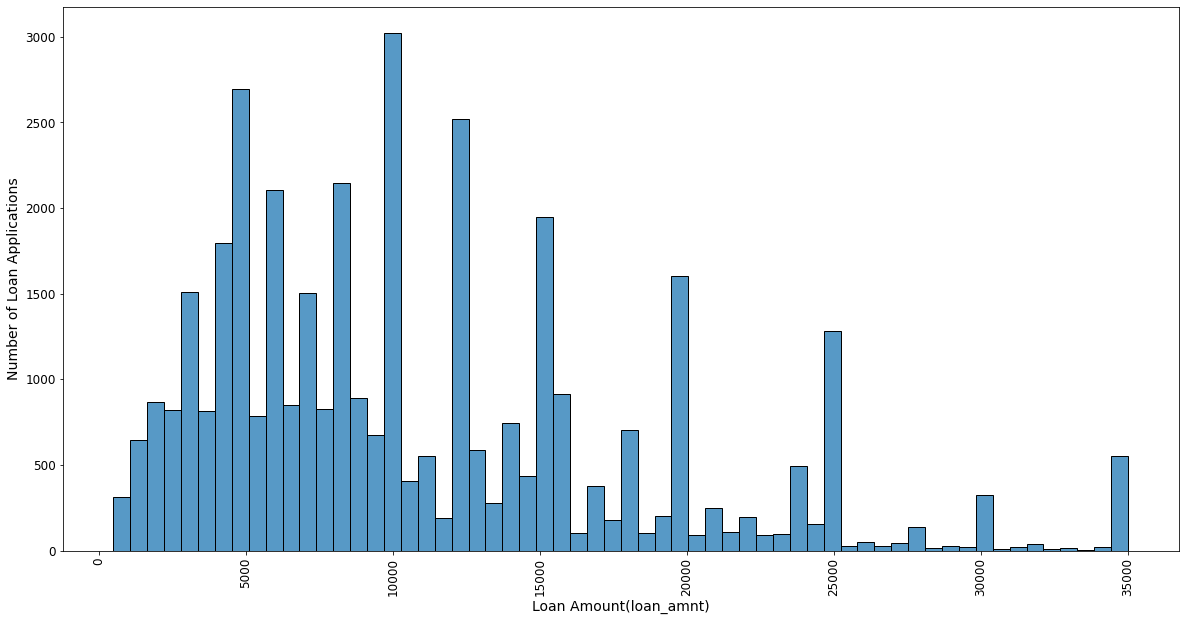

In [62]:
plotHist(loanDataSet_analysis_df.loan_amnt,"Loan Amount(loan_amnt)",figX=20)

#### <font color =blue> Analysing `funded_amnt_inv`

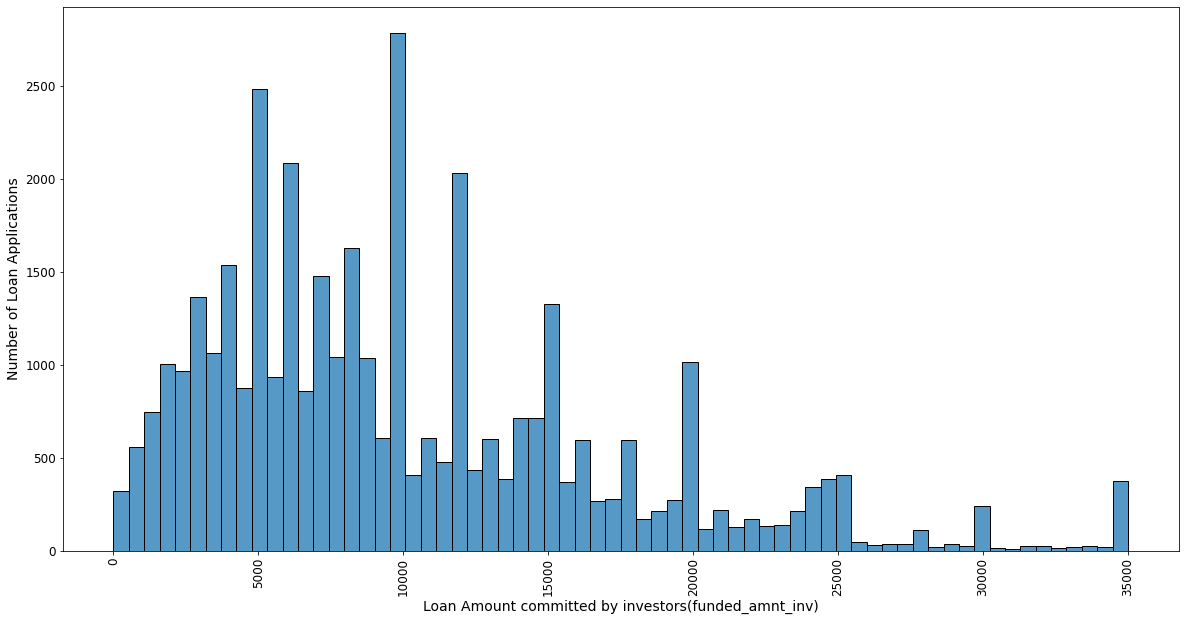

In [63]:
plotHist(loanDataSet_analysis_df.funded_amnt_inv,"Loan Amount committed by investors(funded_amnt_inv)", figX=20)

#### <font color =blue> Analysing `int_rate`

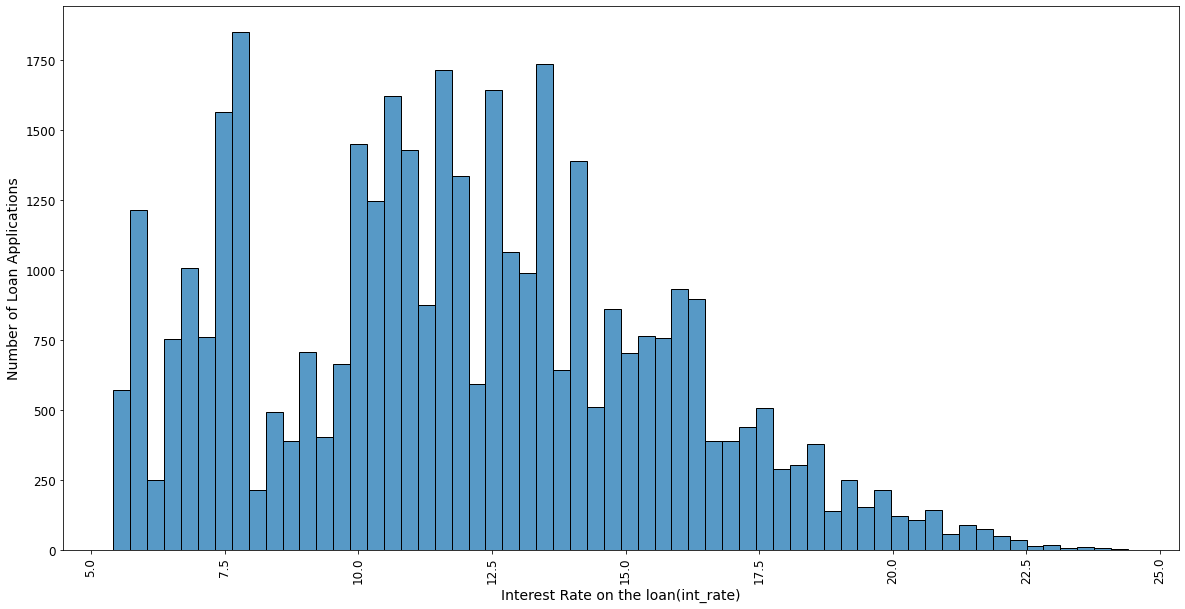

In [64]:
plotHist(loanDataSet_analysis_df.int_rate,"Interest Rate on the loan(int_rate)", figX=20)

#### <font color =blue> Analysing `installment`

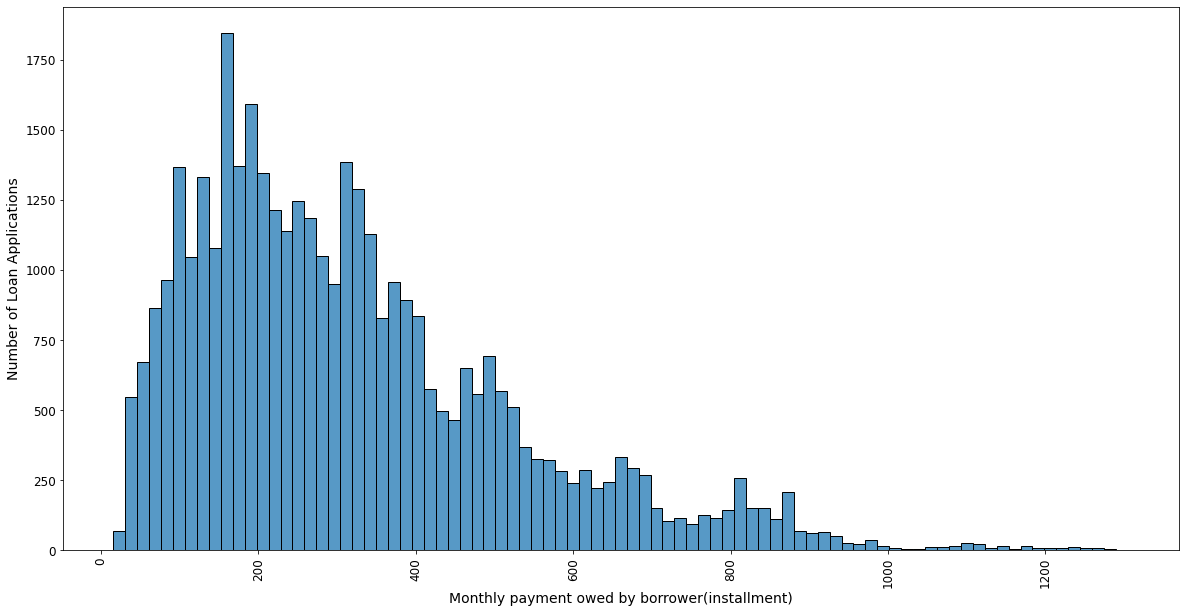

In [65]:
plotHist(loanDataSet_analysis_df.installment,"Monthly payment owed by borrower(installment)", figX=20)

#### <font color =blue> Analysing `annual_inc`

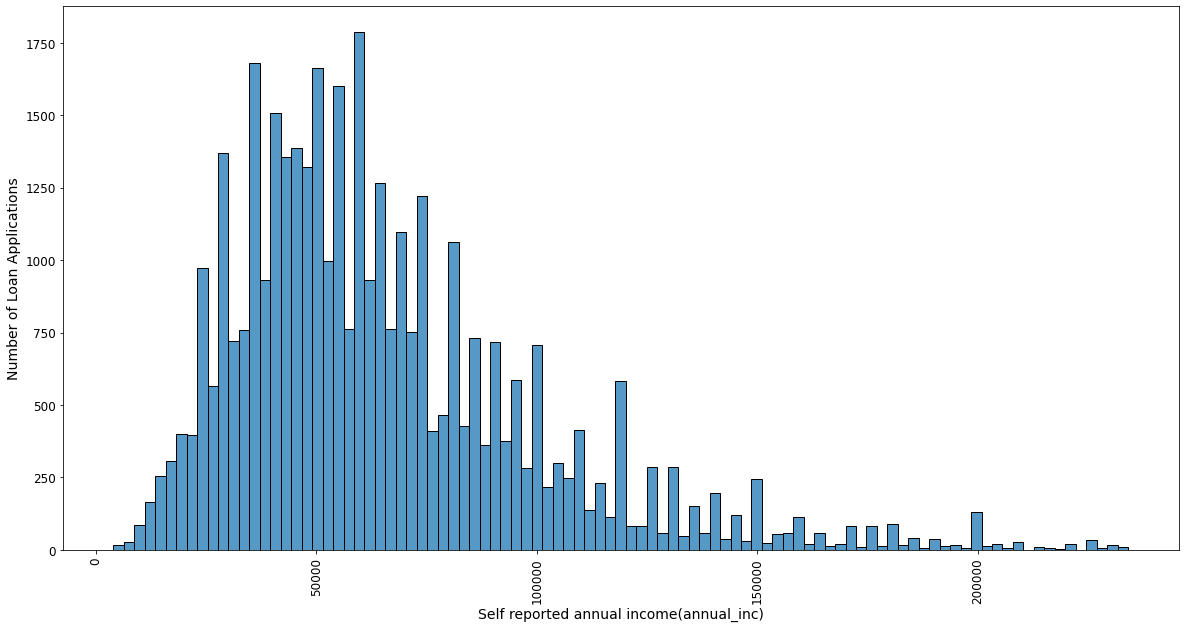

In [66]:
plotHist(loanDataSet_analysis_df.annual_inc,"Self reported annual income(annual_inc)", figX=20)

#### Outcome - Univariate Analysis

Since each of these variables has some value range or specific categories which have higher number of applications or variables like int_rate which are pretty common. 

As the data itself is for approved applicants hence to conclude these categories are highest applicants will be inconclusive but we can say that once existing approval mechanism filters out the applicants then among those these categories have the highest application submission-approval.

We observed that:
- Loan amounts **10000**, **5000** are the most soughted ones
- Among interest rates **7.5-8%** is given to large number of applicants and then there is drop and then **>10%** interest again it picks up. It seems some category is having resulting lower interest rates granted.
- Majority loans have installments in range of **175-200**
- Quite a major chunk of loan applicants are in range of **40k-70k** as annual income

We will be using these to further target our analysis in segmented univariate and bivariate analysis so that we can discover pattern for applicant ***default*** and share recommendations.

### Segmented Univariate Analysis

In [67]:
categoricalColumns_analysis = loanDataSet_analysis_df.dtypes[loanDataSet_analysis_df.dtypes == object].index # extracting all columns having object datatypes
print("Following are" +'\033[1m'+ " categrorical" + '\033[0m' +" variables:")
print(categoricalColumns_analysis.tolist())

numericColumns_analysis = loanDataSet_analysis_df.dtypes[loanDataSet_analysis_df.dtypes != object].index # extracting all columns having object datatypes
print("\nFollowing are" +'\033[1m'+ " numeric" + '\033[0m' +" variables:")
print(numericColumns_analysis.tolist())

Following are categrorical variables:
['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'issue_month']

Following are numeric variables:
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec_bankruptcies', 'issue_year']


#### <font color =blue> Analysing `grade` (unordered, categorical)
    
Sub-grade we will use in further analysis as not benefit of drilling down on univariate

In [68]:
loanDataSet_analysis_df.grade.value_counts()

B    11581
A     9977
C     7753
D     5027
E     2610
F      954
G      289
Name: grade, dtype: int64

In [69]:
loanDataSet_analysis_df.grade.isna().sum()

0

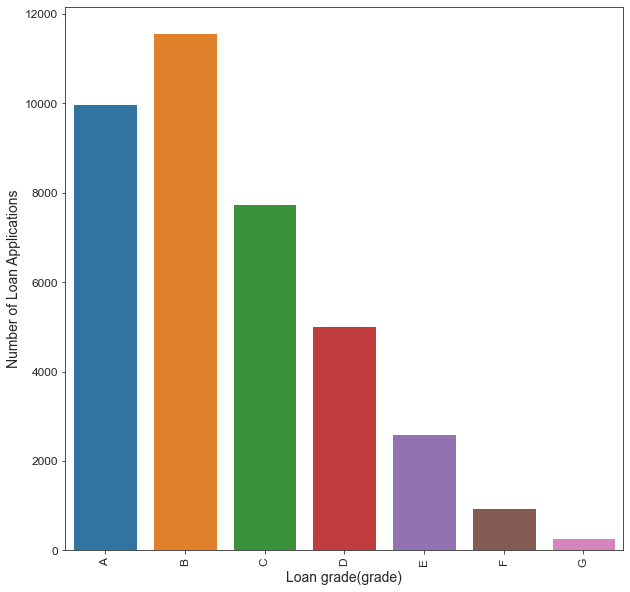

In [70]:
plotCountV(loanDataSet_analysis_df.grade.sort_values(), "Loan grade(grade)")

#### <font color =blue> Analysing `emp_title` (unordered, categorical)
    

In [71]:
loanDataSet_analysis_df.emp_title.value_counts()

US Army                                 131
Bank of America                         107
IBM                                      62
AT&T                                     57
Kaiser Permanente                        56
                                       ... 
Macy's East Inc.                          1
westin                                    1
New Mexico Department of Corrections      1
Sapa                                      1
Evergreen Center                          1
Name: emp_title, Length: 27793, dtype: int64

The data is too varied (27k different values) hence we will limit the data to read the pattern.

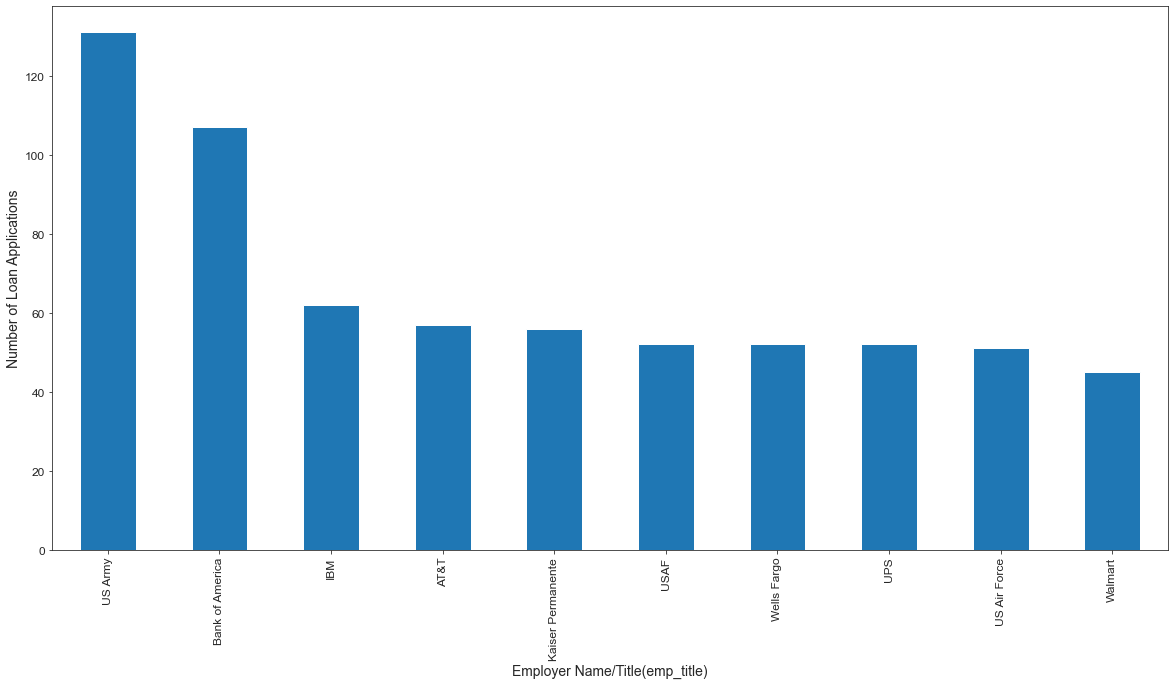

In [72]:
plt.figure(figsize=(20, 10))
loanDataSet_analysis_df.emp_title.value_counts().head(10).plot(kind='bar')
plt.xlabel("Employer Name/Title(emp_title)",fontsize=14)
plt.ylabel("Number of Loan Applications",fontsize=14)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xticks(rotation=90)
plt.show()

In [73]:
loanDataSet_analysis_df.emp_title.isna().sum()

2345

So while **US Amry** is the top employeer whose employees take the loan, there is a major chunk of applicants whose "Employeer Name/Title" itself is unknown

#### <font color =blue> Analysing `emp_length` (ordered, categorical/numeric)
    

In [74]:
loanDataSet_analysis_df.emp_length.value_counts()

10+ years    8354
< 1 year     4479
2 years      4245
3 years      3977
4 years      3315
5 years      3168
1 year       3143
6 years      2151
7 years      1697
8 years      1419
9 years      1215
Name: emp_length, dtype: int64

In [75]:
loanDataSet_analysis_df.emp_length.isna().sum()

1028

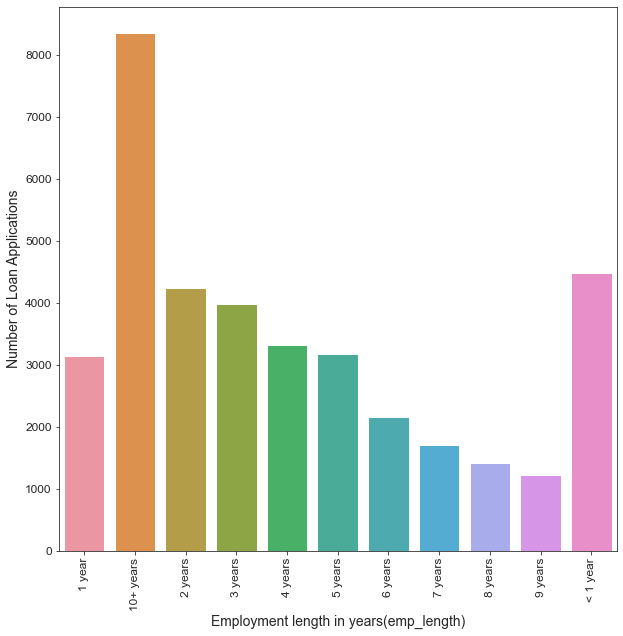

In [76]:
plotCountV(loanDataSet_analysis_df.emp_length.sort_values(), "Employment length in years(emp_length)" )

People working for **higher number of years** have better chance of getting their applications approved or they apply the most. Since we do not have rejection data hence we cannot conclude on this.

#### <font color =blue> Analysing `home_ownership` (unordered, categorical)
    

In [77]:
loanDataSet_analysis_df.home_ownership.value_counts()

RENT        18397
MORTGAGE    16748
OWN          2947
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [78]:
loanDataSet_analysis_df.home_ownership.isna().sum()

0

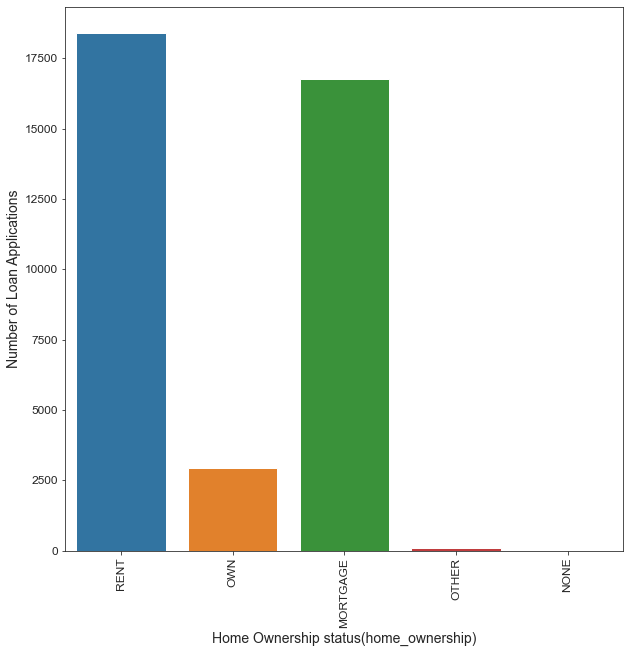

In [79]:
plotCountV(loanDataSet_analysis_df.home_ownership, "Home Ownership status(home_ownership)")

Majority applicants have **mortgaged** or **rented** accomodations

#### <font color =blue> Analysing `verification_status` (unordered, categorical)    

In [80]:
loanDataSet_analysis_df.verification_status.value_counts()

Not Verified       16604
Verified           12031
Source Verified     9556
Name: verification_status, dtype: int64

In [81]:
loanDataSet_analysis_df.verification_status.isna().sum()

0

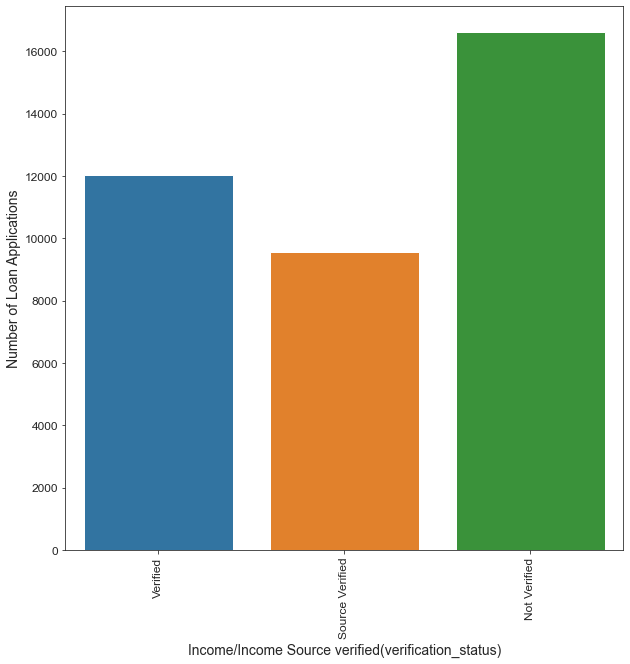

In [82]:
plotCountV(loanDataSet_analysis_df.verification_status, "Income/Income Source verified(verification_status)")

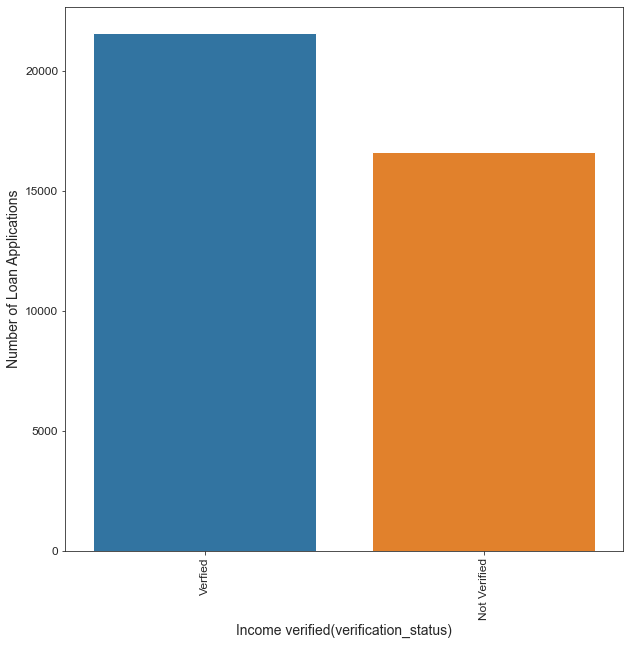

In [83]:
plotCountV(loanDataSet_analysis_df.verification_status.apply(lambda x : 'Verfied' if x in ['Source Verified','Verified'] else x), "Income verified(verification_status)")

#### <font color =blue> Analysing `purpose` (unordered, categorical)

In [84]:
loanDataSet_analysis_df.purpose.value_counts()

debt_consolidation    17917
credit_card            4987
other                  3831
home_improvement       2797
major_purchase         2129
small_business         1723
car                    1491
wedding                 917
medical                 674
moving                  570
vacation                375
house                   357
educational             323
renewable_energy        100
Name: purpose, dtype: int64

In [85]:
loanDataSet_analysis_df.purpose.isna().sum()

0

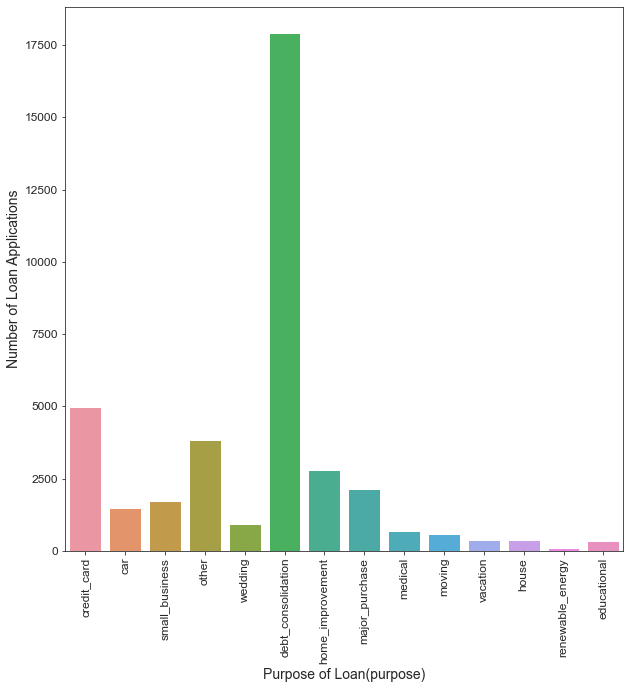

In [86]:
plotCountV(loanDataSet_analysis_df.purpose, "Purpose of Loan(purpose)")

#### <font color =blue> Analysing `issue_month` (ordered, categorical)    

In [87]:
loanDataSet_analysis_df.issue_month.isna().sum()

0

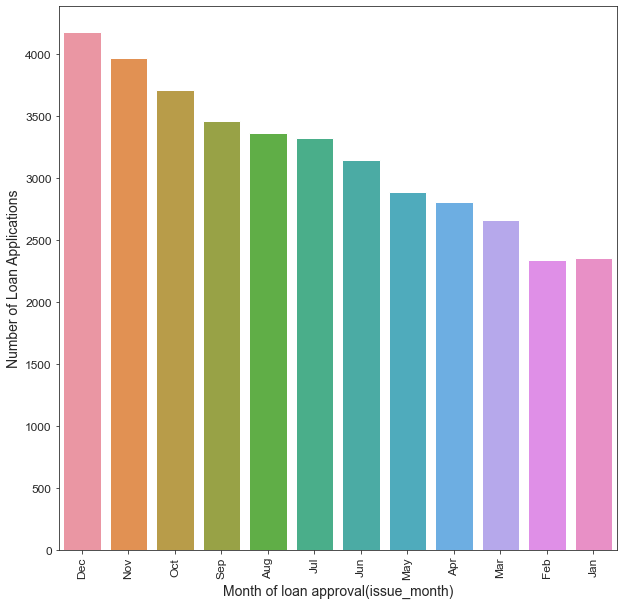

In [88]:
plotCountV(loanDataSet_analysis_df.issue_month, "Month of loan approval(issue_month)")

#### <font color =blue> Analysing `term` (ordered, numeric)

In [89]:
loanDataSet_analysis_df.term.isna().sum()

0

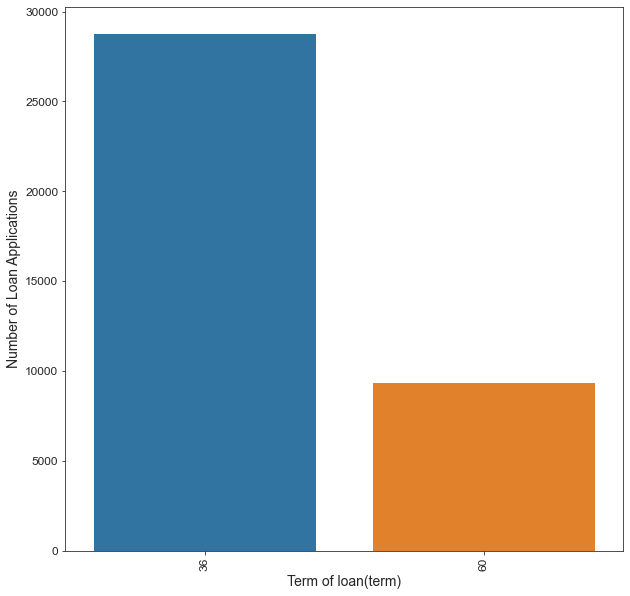

In [90]:
plotCountV(loanDataSet_analysis_df.term, "Term of loan(term)")

#### Outcome - Univariate Segmented Analysis

Since each of these variables has some value range or specific categories which have higher number of applications or variables like int_rate which are pretty common. 

As the data itself is for approved applicants hence to conclude these categories are highest applicants will be inconclusive but we can say that once existing approval mechanism filters out the applicants then among those these categories have the highest application submission-approval.

We observed that :
- Majority applicants have loan grade among **A,B and C**
- **US Army**, **Bank of America** employees are major applicatants or they are the ones which get approved better than others as these are trusted organisations. 
- Majority applicants tend to be either **newly employed** or employed **>= 10 years**
- Majority applicants have **mortgaged** or **rented** accomodations
- Income status is **not a significant** driving variable in for loan. Maybe since application approval also takes in account other factors hence both classes are almost equally allowed
- **Quite** a majority applications has **debt_consilation** as purpose of loan.
- **December** seems to be a month with highest loan approvals.
- **36 months** is the most offered/selected loan repayment term.

We will be using these to further target our analysis in segmented univariate and bivariate analysis so that we can discover pattern for applicant ***default*** and share recommendations.

### Bivariate Analysis

In [91]:
categoricalColumns_analysis = loanDataSet_analysis_df.dtypes[loanDataSet_analysis_df.dtypes == object].index # extracting all columns having object datatypes
print("Following are" +'\033[1m'+ " categrorical" + '\033[0m' +" variables:")
print(categoricalColumns_analysis.tolist())

numericColumns_analysis = loanDataSet_analysis_df.dtypes[loanDataSet_analysis_df.dtypes != object].index # extracting all columns having object datatypes
print("\nFollowing are" +'\033[1m'+ " numeric" + '\033[0m' +" variables:")
print(numericColumns_analysis.tolist())

Following are categrorical variables:
['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'issue_month']

Following are numeric variables:
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec_bankruptcies', 'issue_year']


#### <font color =blue> Analysing `purpose`

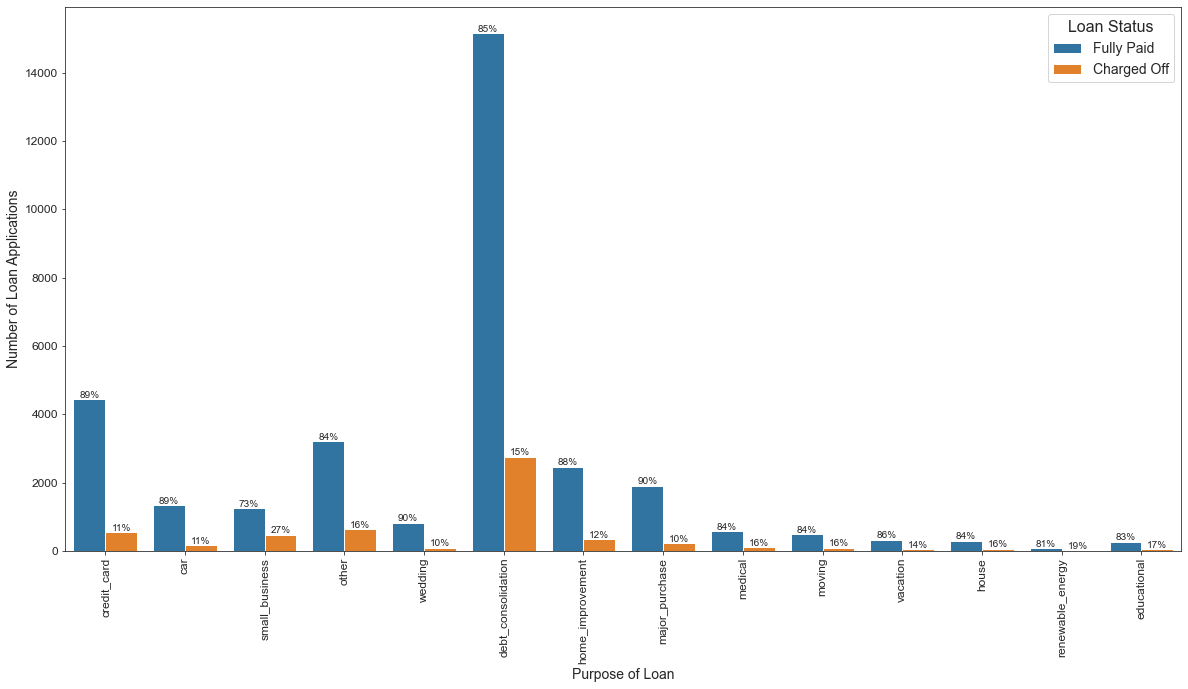

In [92]:
plotCountSegmented(loanDataSet_analysis_df,"purpose", "Purpose of Loan",figX=20)

**Small Business** and **Renewable Energy** purpose has higher chance of ***defaulting***  as they have comparitive percentages of **27%** and **19%** respectively

#### <font color =blue> Analysing `term`

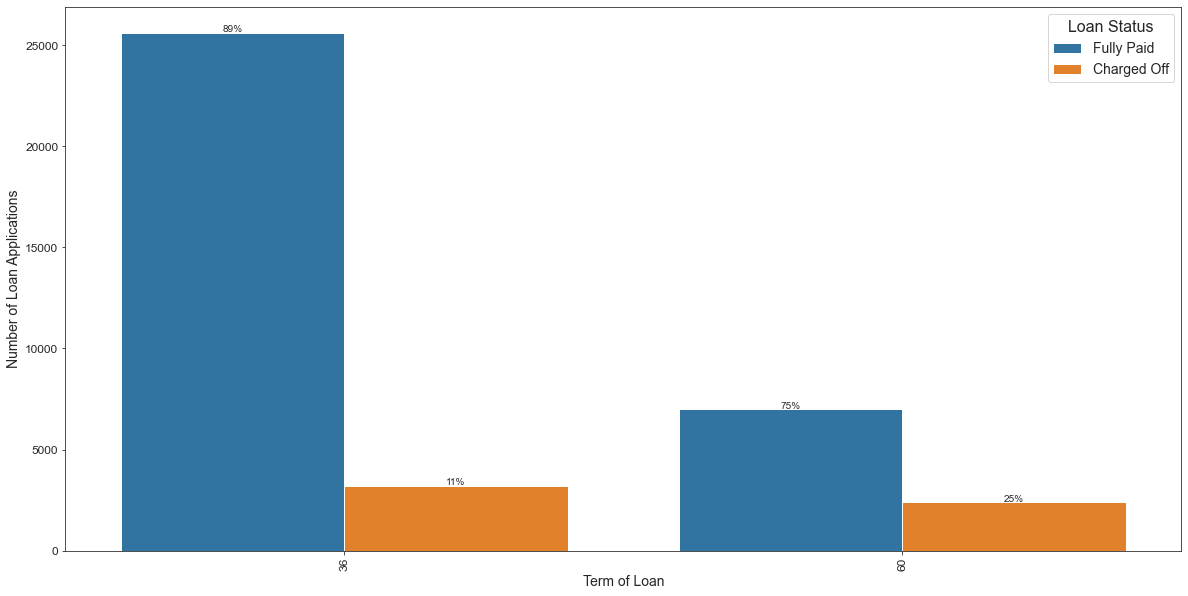

In [93]:
plotCountSegmented(loanDataSet_analysis_df,"term", "Term of Loan",figX=20)

Applicatants with **60 months** as term length have higher chance of ***defaulting*** on loan 

#### <font color =blue> Analysing `int_rate`

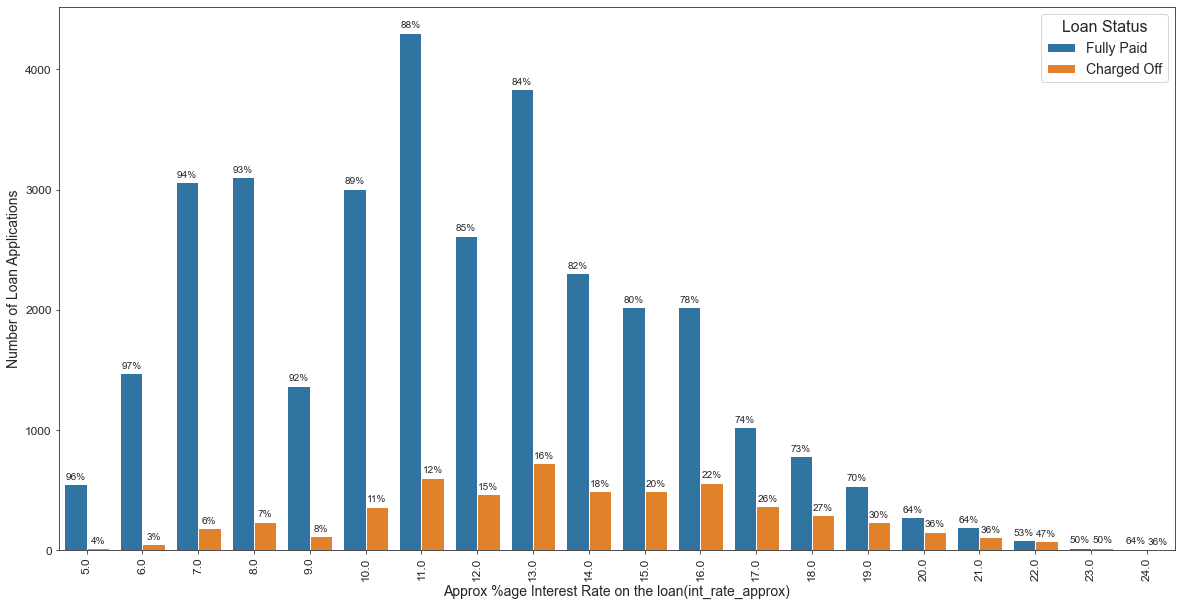

In [94]:
loanDataSet_analysis_df['int_rate_approx'] = loanDataSet_analysis_df.int_rate.round()
plotCountSegmented(loanDataSet_analysis_df, "int_rate_approx", "Approx %age Interest Rate on the loan(int_rate_approx)",figX=20)

Since we are seeing a pattern spreadt out hence we will be using bining to bring out the pattern

In [95]:
loanDataSet_analysis_df = loanDataSet_analysis_df.assign(int_rate_range=pd.cut(loanDataSet_analysis_df['int_rate_approx'],
                               bins=[0, 5, 10, 15, 20, 25],
                               labels=['0-5', '5-10', '10-15', '15-20', '20-25']))

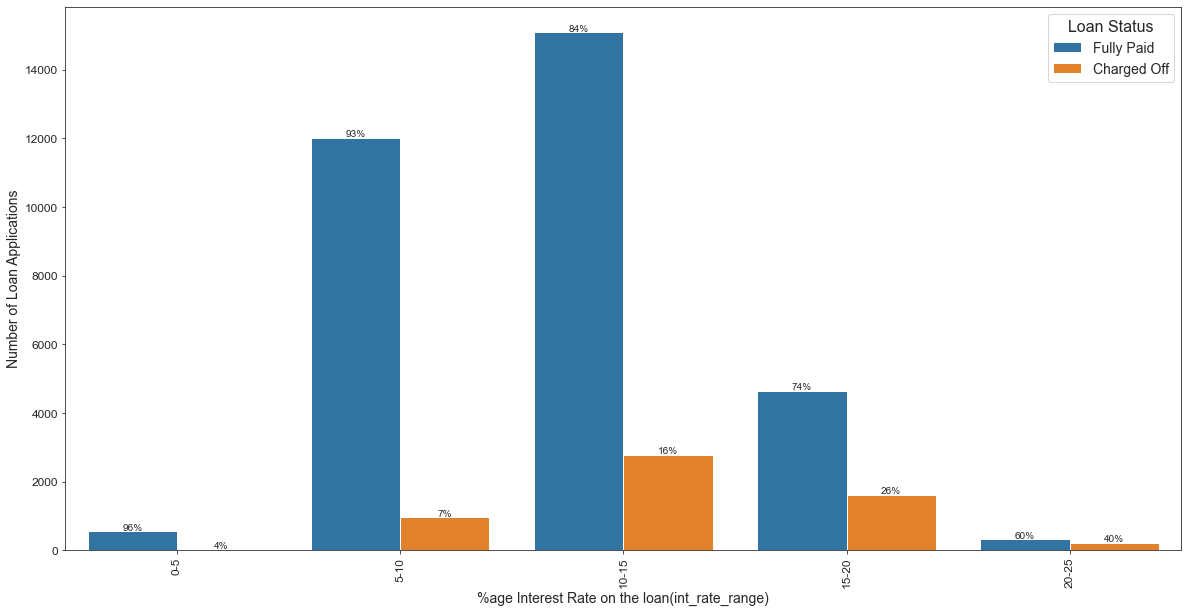

In [96]:
plotCountSegmented(loanDataSet_analysis_df, "int_rate_range", "%age Interest Rate on the loan(int_rate_range)",figX=20)

On binning we are able to clearly see a range of **>18%** of interest rate resulting in more loan ***default*** 

#### <font color =blue> Analysing `pub_rec_bankruptcies`

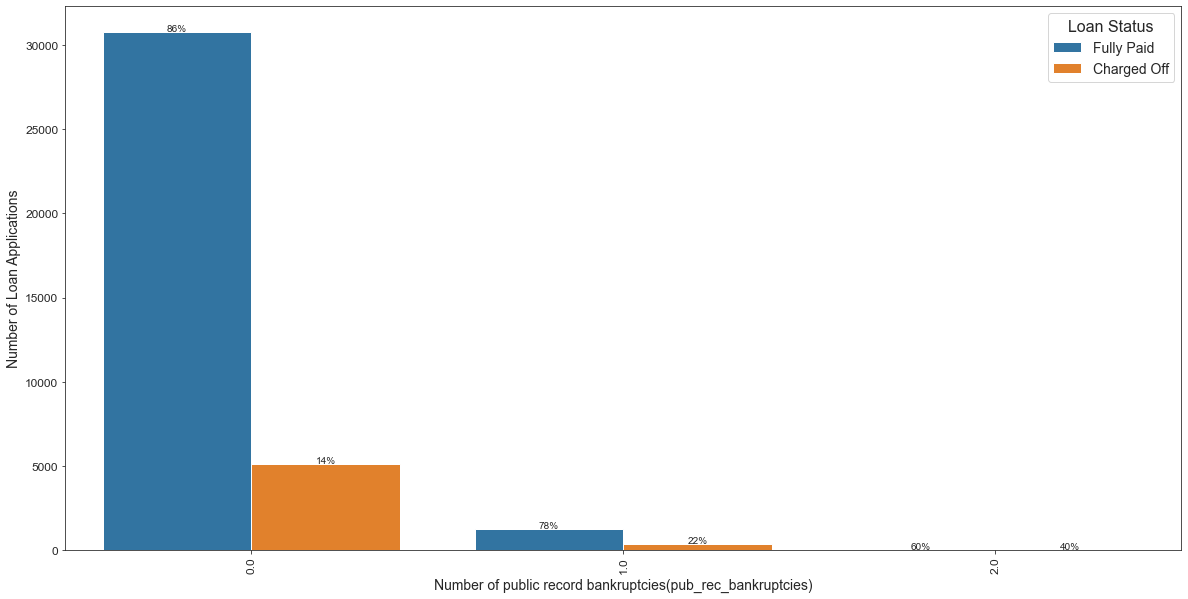

In [97]:
plotCountSegmented(loanDataSet_analysis_df,"pub_rec_bankruptcies", "Number of public record bankruptcies(pub_rec_bankruptcies)",figX=20)

We can applicants with previous record of bankruptcies tend to ***default*** more which is expected pattern but majority of applicants with **1** bankruptcy still payback so thats business gained.

#### <font color =blue> Analysing `dti`

In [98]:
loanDataSet_analysis_df.dti.value_counts()

0.00     176
18.00     45
12.00     44
19.20     39
13.20     39
        ... 
29.16      1
25.04      1
27.82      1
25.58      1
25.43      1
Name: dti, Length: 2853, dtype: int64

Since thats lot of values we will use **binning** to **derive** new column **`dti_range`**

In [99]:
loanDataSet_analysis_df.dti.describe()

count    38191.000000
mean        13.333491
std          6.657843
min          0.000000
25%          8.210000
50%         13.430000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [100]:
loanDataSet_analysis_df = loanDataSet_analysis_df.assign(dti_range=pd.cut(loanDataSet_analysis_df['dti'],
                               bins=[0, 5, 10, 15, 20, 25, 30],
                               labels=['0-5', '5-10', '10-15', '15-20', '20-25' ,'25-30']))

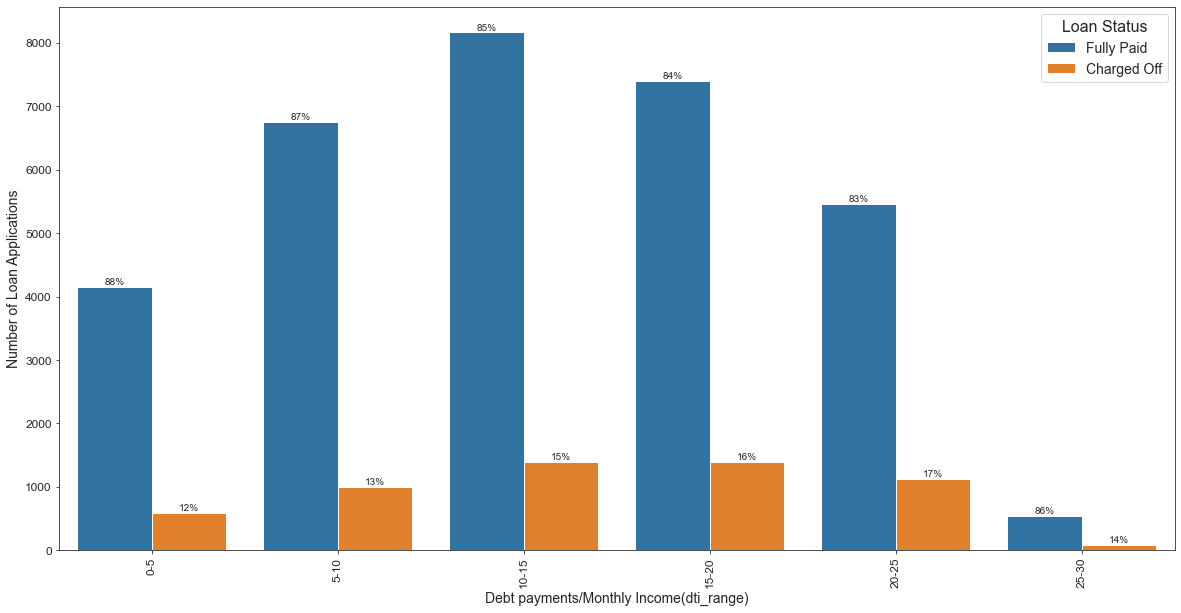

In [101]:
plotCountSegmented(loanDataSet_analysis_df,"dti_range", "Debt payments/Monthly Income(dti_range)",figX=20)

In [102]:
loanDataSet_analysis_df = loanDataSet_analysis_df.assign(dti_range=pd.cut(loanDataSet_analysis_df['dti'],
                               bins=[0, 10, 20, 30],
                               labels=['0-10', '10-20', '20-30']))

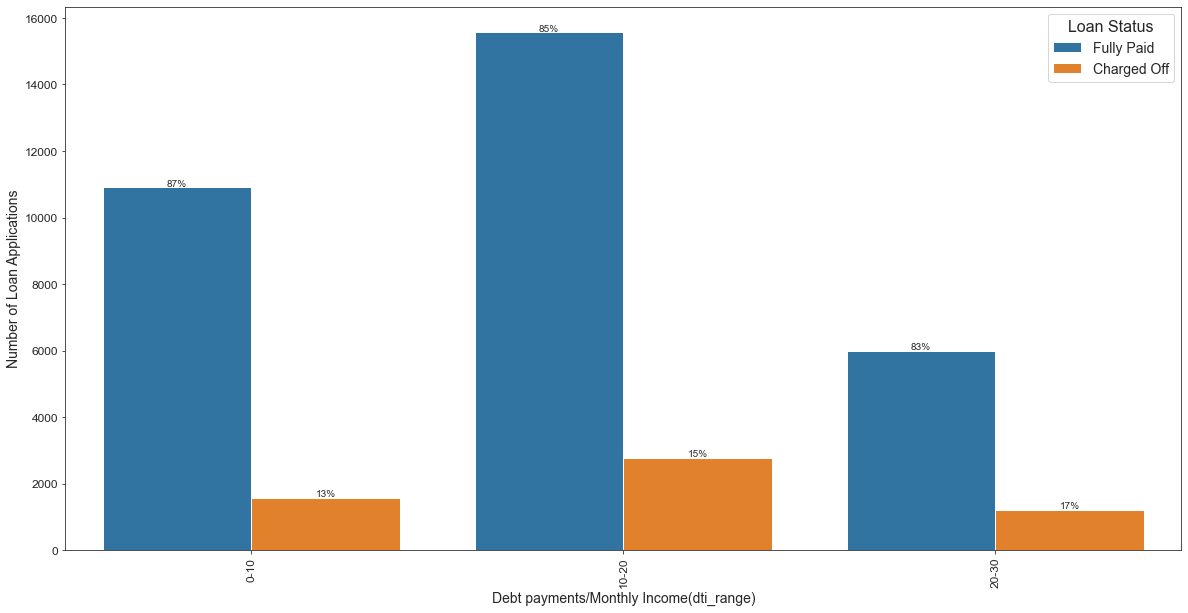

In [103]:
plotCountSegmented(loanDataSet_analysis_df,"dti_range", "Debt payments/Monthly Income(dti_range)",figX=20)

Applicants with **dti** between 20-25 have higher chances of ***default***

#### <font color =blue> Analysing `loan_amnt` and `funded_amnt_inv`

In [104]:
loanDataSet_analysis_df.loan_amnt.value_counts()

10000    2787
12000    2230
5000     2018
6000     1879
15000    1821
         ... 
16550       1
17900       1
13175       1
11275       1
22550       1
Name: loan_amnt, Length: 867, dtype: int64

In [105]:
loanDataSet_analysis_df.loan_amnt.describe()

count    38191.000000
mean     10962.265979
std       7266.157660
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [106]:
loanDataSet_analysis_df = loanDataSet_analysis_df.assign(loan_amnt_range=pd.cut(loanDataSet_analysis_df['loan_amnt'],
                               bins=[0,5000, 10000,15000, 20000, 25000, 35000],
                               labels=['0-5000', '5000-10000', '10000-15000','15000-20000', '20000-25000', '25000-35000']))

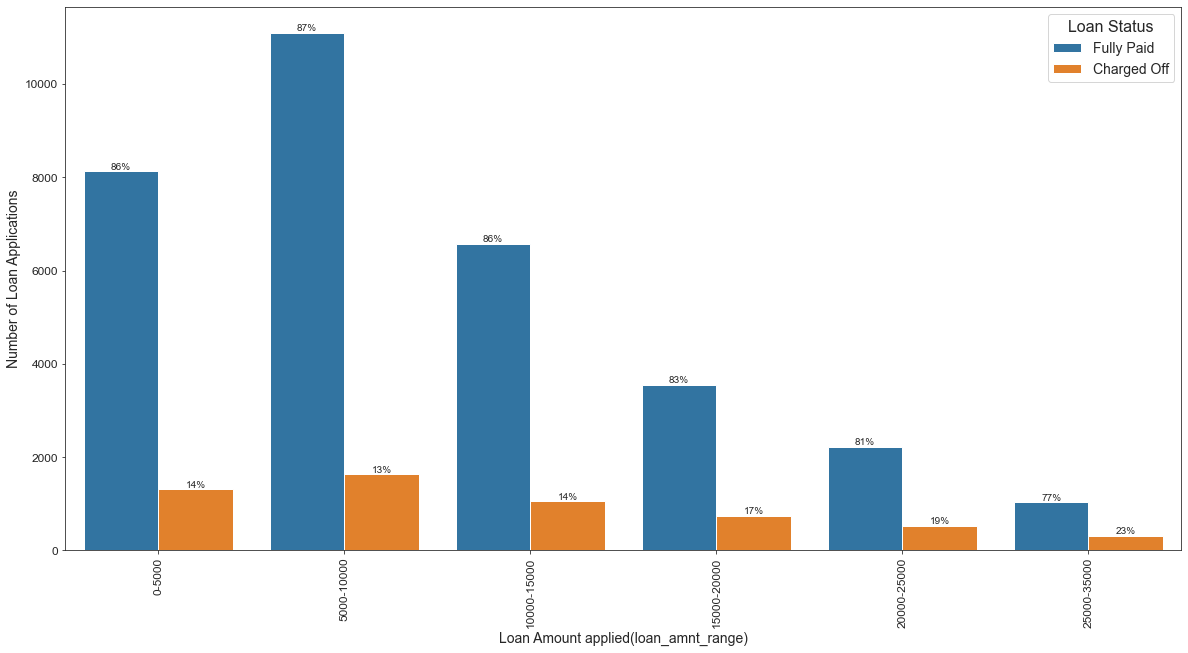

In [107]:
plotCountSegmented(loanDataSet_analysis_df,"loan_amnt_range", "Loan Amount applied(loan_amnt_range)",figX=20)

In [108]:
loanDataSet_analysis_df.funded_amnt_inv.describe()

count    38191.000000
mean     10146.556380
std       6943.535384
min          0.000000
25%       5000.000000
50%       8575.000000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [109]:
loanDataSet_analysis_df = loanDataSet_analysis_df.assign(funded_amnt_inv_range=pd.cut(loanDataSet_analysis_df['funded_amnt_inv'],
                               bins=[0,5000, 10000,15000, 20000, 25000, 35000],
                               labels=['0-5000', '5000-10000', '10000-15000','15000-20000', '20000-25000', '25000-35000']))

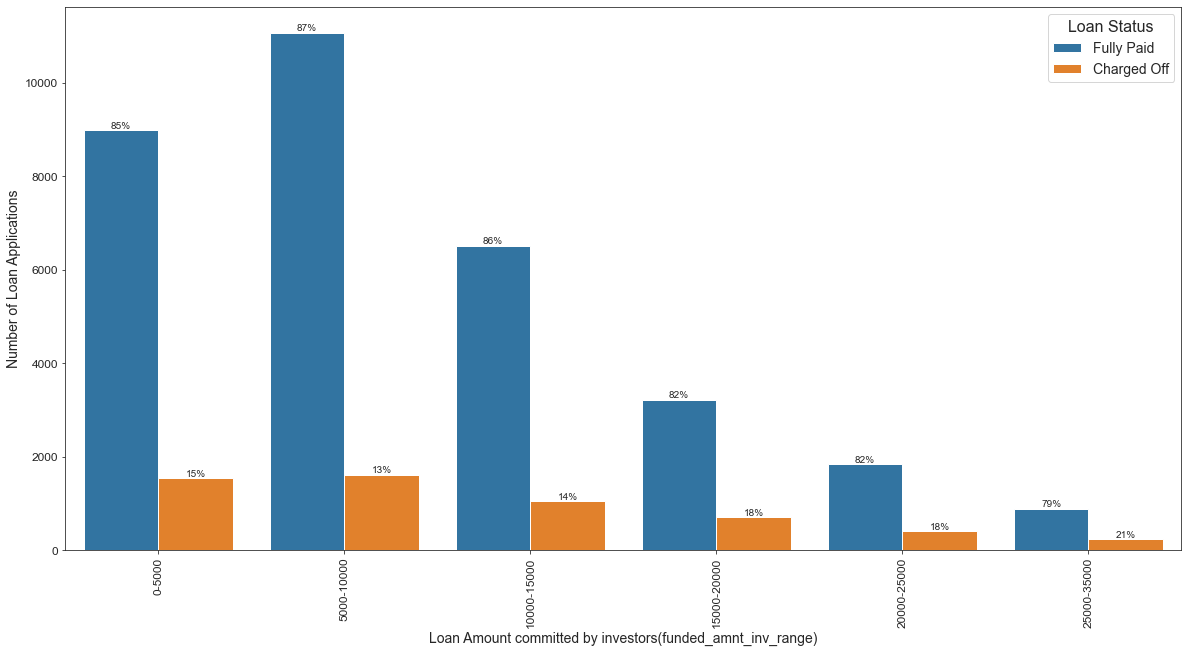

In [110]:
plotCountSegmented(loanDataSet_analysis_df,"funded_amnt_inv_range", "Loan Amount committed by investors(funded_amnt_inv_range)",figX=20)

Based on these binned blots its quite evident that **higher** the amount, more the chances of ***default***

#### <font color =blue> Analysing `home_ownership`

posx and posy should be finite values
posx and posy should be finite values


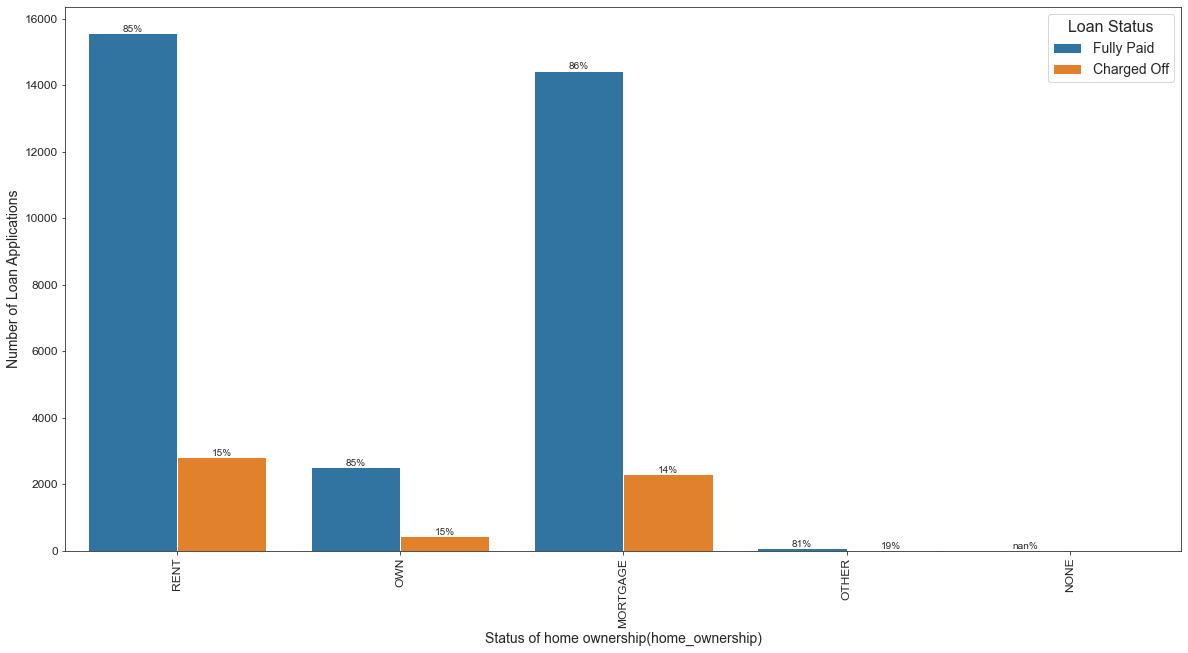

In [111]:
plotCountSegmented(loanDataSet_analysis_df,"home_ownership", "Status of home ownership(home_ownership)",figX=20)

No significant trend here

#### <font color =blue> Analysing `grade`

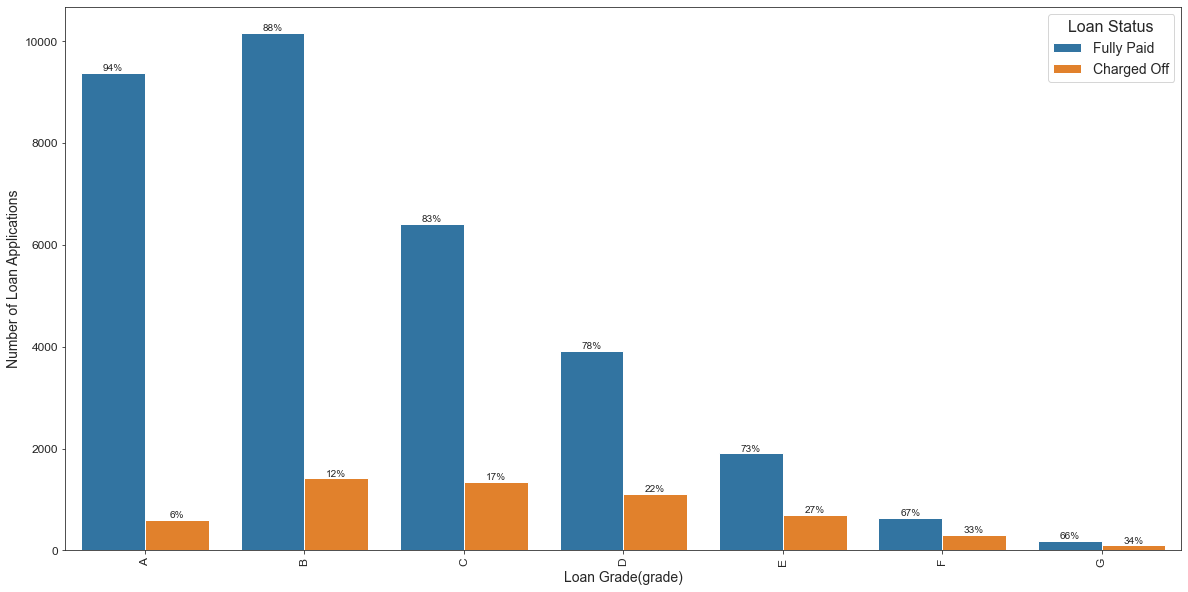

In [112]:
plotCountSegmented(loanDataSet_analysis_df.sort_values(by="grade"),"grade", "Loan Grade(grade)",figX=20)

As grade **increases** the amount of ***default*** is also increasing. 

#### <font color =blue> Analysing `addr_state`

Since there are lots of states hence we need a logical way to bin them. 

We will be using Region binning based on US Census data : https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf


In [113]:
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south = ['AZ', 'TX', 'NM', 'OK', 'GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

In [114]:
def mapRegions(state):
    if state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    elif state in west:
        return 'West'
    elif state in south:
        return 'South'


In [115]:
loanDataSet_analysis_df['state_region'] = loanDataSet_analysis_df['addr_state'].apply(mapRegions)

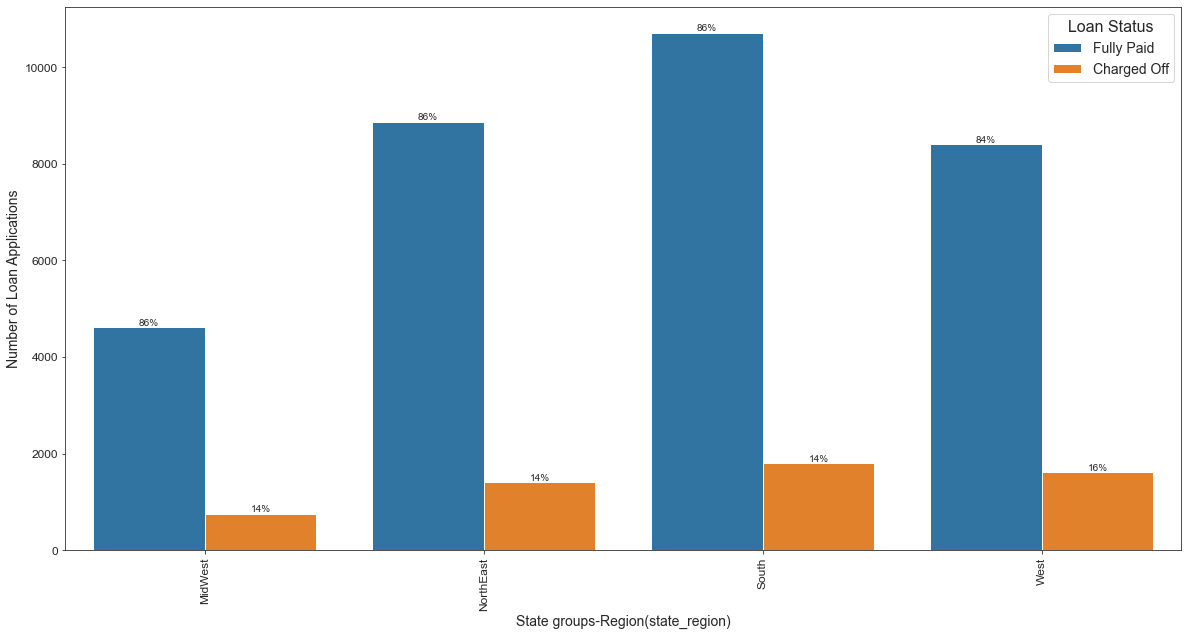

In [116]:
plotCountSegmented(loanDataSet_analysis_df.sort_values(by="state_region"),"state_region", "State groups-Region(state_region)",figX=20)

Across regions we suprisingly have same ratio of ***defaults*** with West being the poorest performing.

#### <font color =blue> Analysing `issue_month`

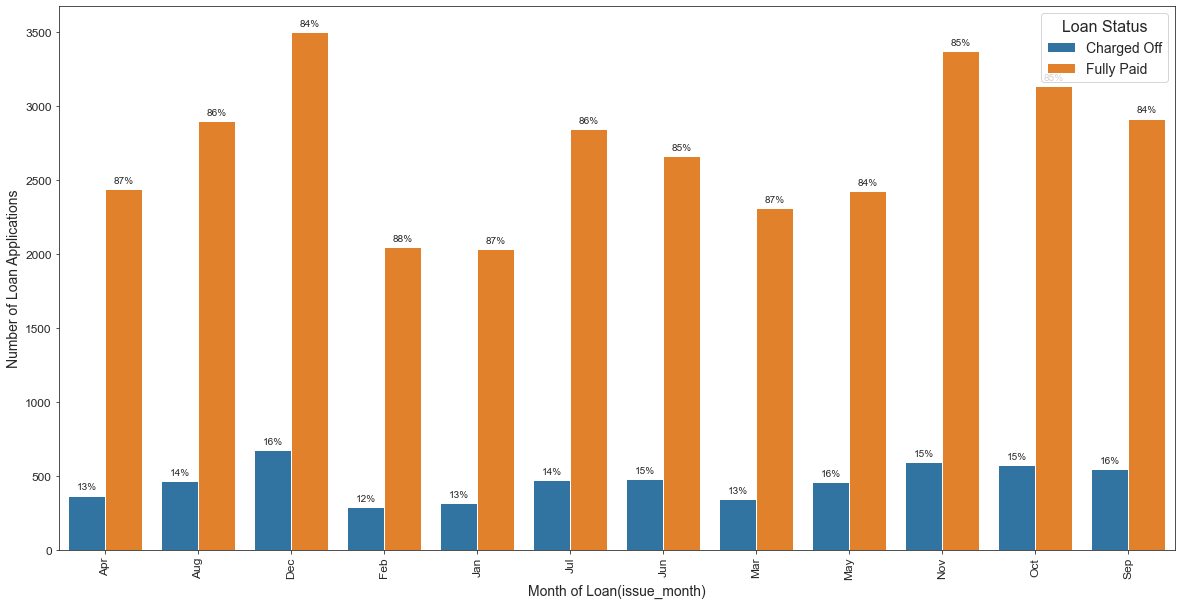

In [117]:
plotCountSegmented(loanDataSet_analysis_df.sort_values(by="issue_month"),"issue_month", "Month of Loan(issue_month)",figX=20)

**December** seems to be the month of max approvals and hence the ***default***. It seems applications are approved without due deligence to meet year end goals which translate into **credit loss**

#### <font color =blue> Analysing `emp_length`

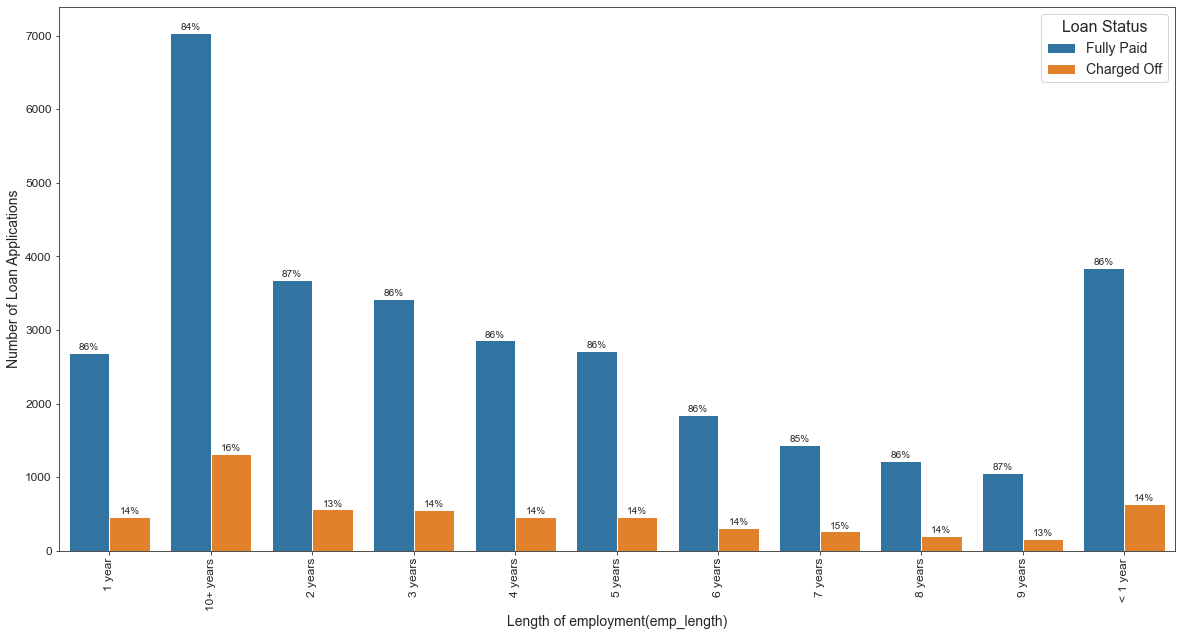

In [118]:
plotCountSegmented(loanDataSet_analysis_df.sort_values(by="emp_length"),"emp_length", "Length of employment(emp_length)",figX=20)

Since higher amount of loans are given to 10+ category, they also tend to default more but ratio is quite similar across all employement lengths

#### <font color =blue> Analysing `annual_inc`

In [119]:
loanDataSet_analysis_df.annual_inc.describe()

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

In [120]:
loanDataSet_analysis_df = loanDataSet_analysis_df.assign(annual_inc_range=pd.cut(loanDataSet_analysis_df['annual_inc'],
                               bins=[0,50000, 100000,150000, 200000, 250000],
                               labels=['0-50000', '50000-100000', '100000-150000','150000-200000', '200000-250000']))

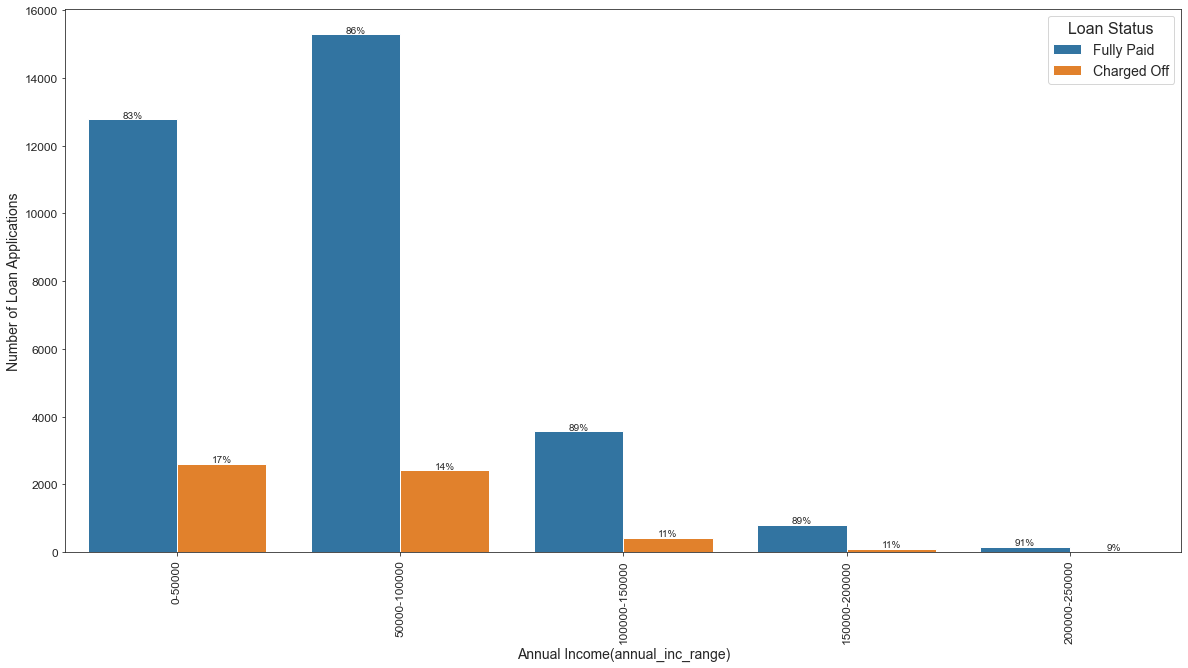

In [121]:
plotCountSegmented(loanDataSet_analysis_df,"annual_inc_range", "Annual Income(annual_inc_range)",figX=20)

This clearly highlights that applicants with **lower income** tend to ***default*** more.

#### Outcome - Bivariate Analysis

We observed that :
- Loans taken for **Small Business** and **Renewable Energy** purpose has higher chances of ***defaulting*** 
- Applicants having **60 months** as term length have higher chances of ***defaulting*** on loan
- **18% ang greater** interest rate results in more loan ***default*** as applicants seems to having hard time paying higher interest rates
- Applicants with **dti** **>20** have higher chances of ***default*** which is logical since they have more debt payments to be paid for given amount of monthly income.
- **Higher** the amount, more the chances of ***default***
- **Higher loan grades (>C)** although have less approved applications but have very high ***default*** especially **G**
- **December** seems to be the month of max approvals and hence the ***default***.
- Chances of ***default*** Decreses if applicatant has higher income applicant i.e. >= 100000

#### Correlation amount the variables

We would be fine tunning the outcomes of bivariate analysis by eliminating the drivers which are highly co-related

In [122]:
loanDataSet_analysis_df['grade_numeric'] = loanDataSet_analysis_df.grade.map({'A': 1, "B": 2,'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7 })
loanDataSet_analysis_df['loan_status_numeric'] = loanDataSet_analysis_df.loan_status.map({'Fully Paid': 0, "Charged Off": 1})

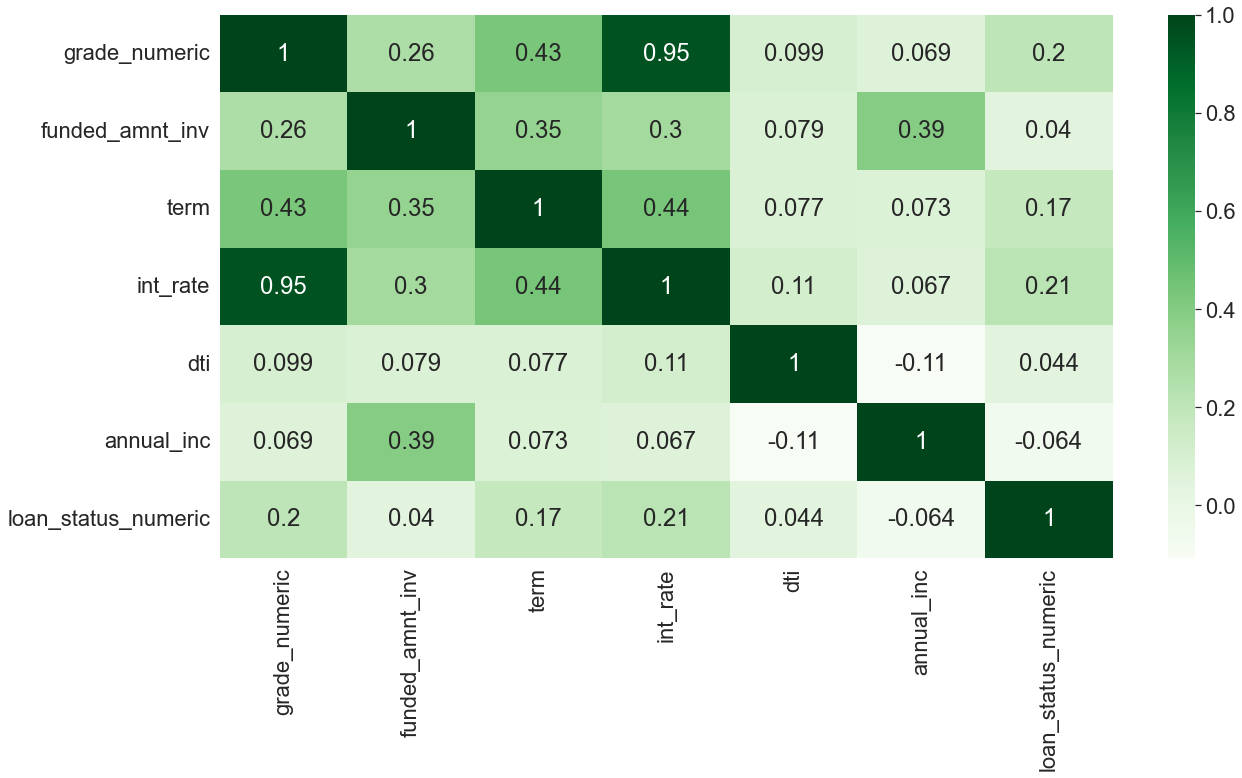

In [123]:
sns.set(font_scale=2)
plt.figure(figsize=[20,10])
sns.heatmap(loanDataSet_analysis_df[['grade_numeric', 'funded_amnt_inv', 'term', 'int_rate','dti','annual_inc', 'loan_status_numeric']].corr(), cmap='Greens', annot=True)
plt.show()

We can observe **interest rate(int_rate)** and **grade** are **highly co-related** hence only one can be considered when trying to screen whether a given application will ***default*** or not.

## <font color =orange> **4. Recommendations**

- More amount of loan should be given for **wedding** purpose since default rate is very low and number of loans are quite less in this category, same is true for **car** loans. 
- **Renewable Energy** loans applications are already less they should be completely avoided.
- **Higher interest** rate and **Higher amount** loans should be given to applicants with **higher annual income** as they have capability to pay off loans as this has negative correlation with **dti** since monthly income is greater
- The employeer reputation is also a driver, hence applicants from reputed organisations like **US Army** etc should be given prefernece.
- Applications approved in **December** should be scrutnized more since they are having higher ***defaults***.